## EXPLORATORY DATA ANALYSIS

Context:
    
- The dataset has been scraped from admissions portals for Graduate Admission : Yocket, Edulix, MSinUS
- The dataset consists of only the Accept or Reject for Masters in Computer Science department
- This dataset has been prepared for 29 universities in the USA
- The purpose of the dataset to develop models to help in graduate admission process for student and university.

<b> Required Libraries </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

<b> Importing the data set </b>

In [3]:
dataset = pd.read_csv(r'../../data/clean_profile_data_all.csv')

In [4]:
dataset.head()

gre_score  gre_score_quant  gre_score_verbal  test_score_toefl  \
0        316              164               152             106.0   
1        314              163               151             114.0   
2        307              160               147              88.0   
3        330              169               161             113.0   
4        316              163               153              99.0   

   undergraduation_score  work_ex  papers_published          university_name  \
0                   2.90        9                 3  northeastern_university   
1                   3.53        7                 3  northeastern_university   
2                   3.00       36                 0  northeastern_university   
3                   2.40       48                 3  northeastern_university   
4                   2.71       30                 0  northeastern_university   

   status  ranking  
0  accept       15  
1  accept       15  
2  accept       15  
3  accept       15  
4  accept       15

In [5]:
print(dataset.shape)

(9350, 10)


- From the output, we can see that the dataset contains 9350 rows and 10 columns



In [6]:
dataset.columns

Index(['gre_score', 'gre_score_quant', 'gre_score_verbal', 'test_score_toefl',
       'undergraduation_score', 'work_ex', 'papers_published',
       'university_name', 'status', 'ranking'],
      dtype='object')

The list of features for the datset are mentioned :
 - gre_score : GRE Score of the student
 - gre_score_quant : GRE Quant score of the student
 - gre_score_verbal : GRE Verbal score of the student
 - test_score_toefl : English exam score of the student
 - undergraduation_score : Undergraduation score of the student
 - work_ex : Work experience before admit or reject of the student
 - papers_published: Papers published in Local/National/International journal
 - university_name: University name to which student has applied
 - status: Status of the application of the student for a university
 - ranking: University ranking

In [41]:
dataset.describe()

gre_score  gre_score_quant  gre_score_verbal  test_score_toefl  \
count  9350.000000      9350.000000       9350.000000       9350.000000   
mean    314.155722       162.828984        151.326738         97.540963   
std       8.641709         4.840835          5.834517         22.163377   
min     260.000000       130.000000        130.000000          0.000000   
25%     308.000000       160.000000        148.000000         95.000000   
50%     314.000000       163.000000        151.000000        103.000000   
75%     320.000000       167.000000        155.000000        109.000000   
max     340.000000       170.000000        170.000000        120.000000   

       undergraduation_score      work_ex  papers_published      ranking  
count            9350.000000  9350.000000       9350.000000  9350.000000  
mean                3.029640    16.857540          0.726417    47.039251  
std                 0.488294    16.127621          1.223988    33.960770  
min                 1.060000     0.000000          0.000000     1.000000  
25%                 2.720000     2.000000          0.000000    16.000000  
50%                 3.100000    15.000000          0.000000    35.000000  
75%                 3.400000    27.000000          1.000000    64.000000  
max                 4.000000   153.000000          3.000000   130.000000

- Information about the datatype

<b> Categorical and Numerical values </b>

In [8]:
datatypes=dataset.dtypes.value_counts()
datatypes_list = datatypes.index.tolist()
datatypesdf=pd.DataFrame()
datatypesdf["datatype"]=datatypes_list
datatypesdf["total"]=[datatypes[0],datatypes[1],datatypes[2]]

  datatype  total
0    int64      6
1   object      2
2  float64      2


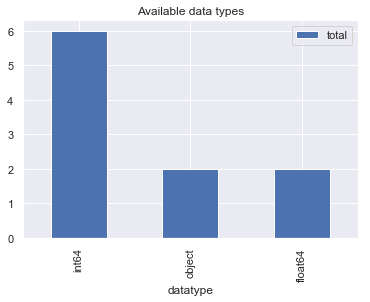

In [9]:
print(datatypesdf)
datatypesdf.plot(x="datatype", kind='bar',title="Available data types")

- As seen below, we have we 6 int, 2 float and 2 objects for the dataset

<b> Total Accepts and rejects </b>

In [65]:
print(dataset['status'].value_counts())
print('===================================')
print('Percentage of Accept and Reject Values in the dataset')
print(dataset['status'].value_counts(normalize = True))

reject    5003
accept    4347
Name: status, dtype: int64
Percentage of Accept and Reject Values in the dataset
reject    0.53508
accept    0.46492
Name: status, dtype: float64


In [11]:
accept_list = dataset[dataset['status'] == 'accept']
reject_list = dataset[dataset['status'] == 'reject']

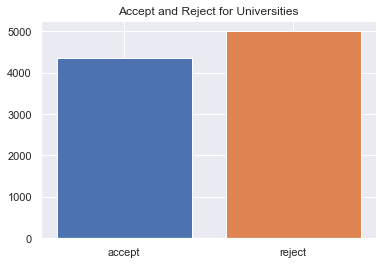

In [12]:
plt.bar('accept',len(accept_list))
plt.bar('reject',len(reject_list))
plt.title('Accept and Reject for Universities')
plt.show()

 - As seen from the above bar chart, the total number of reject are more than the total number of accept considering all 29 universities.
 - The reject have 53.5% of the total dataset values
 - The accept have 46.5% of the total dataset values
 - It signfies that accordin to the datset collected from portals, studnet reported more rejects than admit for the Computer Science department in USA for Graduate studies

<b> Universities accept and Reject </b>

In [13]:
university_list = dataset['university_name'].unique().tolist()

In [14]:
print(len(university_list),str('universities') + '\n')
print([x for x in university_list])

29 universities

['northeastern_university', 'carnegie_mellon_university', 'clemson_university', 'george_mason_university', 'georgia_institiute_of_technology', 'illinois_institute_of_technology', 'indiana_university_bloomington', 'kansas_state_university', 'university_of_maryland_college_park', 'michigan_technological_university', 'north_carolina_state_university_raleigh', 'new_york_university', 'rochester_institute_of_technology', 'rutgers_university_new_brunswick', 'state_university_of_new_york_at_stony_brook', 'syracuse_university', 'texas_a_m_university_college_station', 'university_of_connecticut', 'university_of_colorado_boulder', 'university_of_california_irvine', 'university_of_florida', 'university_of_north_carolina_at_charlotte', 'university_of_southern_california', 'university_of_texas_arlington', 'university_of_texas_austin', 'university_of_texas_dallas', 'university_of_iowa', 'university_of_cincinnati', 'worcester_polytechnic_institute']


- As seen above, we have considered 29 universities in total for the creation of the dataset

In [146]:
dataset.groupby(by=["university_name"]).mean()["ranking"].sort_values()#.plot.bar(y = 'dc', title = "University vs Ranking",grid = True,fontsize = 30,figsize=(50,15))
#axes[0].title.set_size(40)
#dataset.plot.title('Legal Collectible Answer Distribution', fontsize=20)

university_name
carnegie_mellon_university                       1.0
georgia_institiute_of_technology                 9.0
university_of_maryland_college_park             10.0
northeastern_university                         15.0
university_of_texas_austin                      16.0
university_of_southern_california               19.0
new_york_university                             22.0
university_of_california_irvine                 23.0
rutgers_university_new_brunswick                25.0
university_of_north_carolina_at_charlotte       30.0
texas_a_m_university_college_station            31.0
state_university_of_new_york_at_stony_brook     35.0
indiana_university_bloomington                  48.0
north_carolina_state_university_raleigh         49.0
university_of_texas_dallas                      52.0
university_of_colorado_boulder                  58.0
george_mason_university                         59.0
university_of_florida                           62.0
university_of_texas_arlington 

As seen in the plot above, we have considered a wide range of university ranking for the preparation of the dataset.
We have universities ranking ranging from 0-130.
We have considered these universities for Graduate Program for Computer Science

# University name vs Admit/Reject

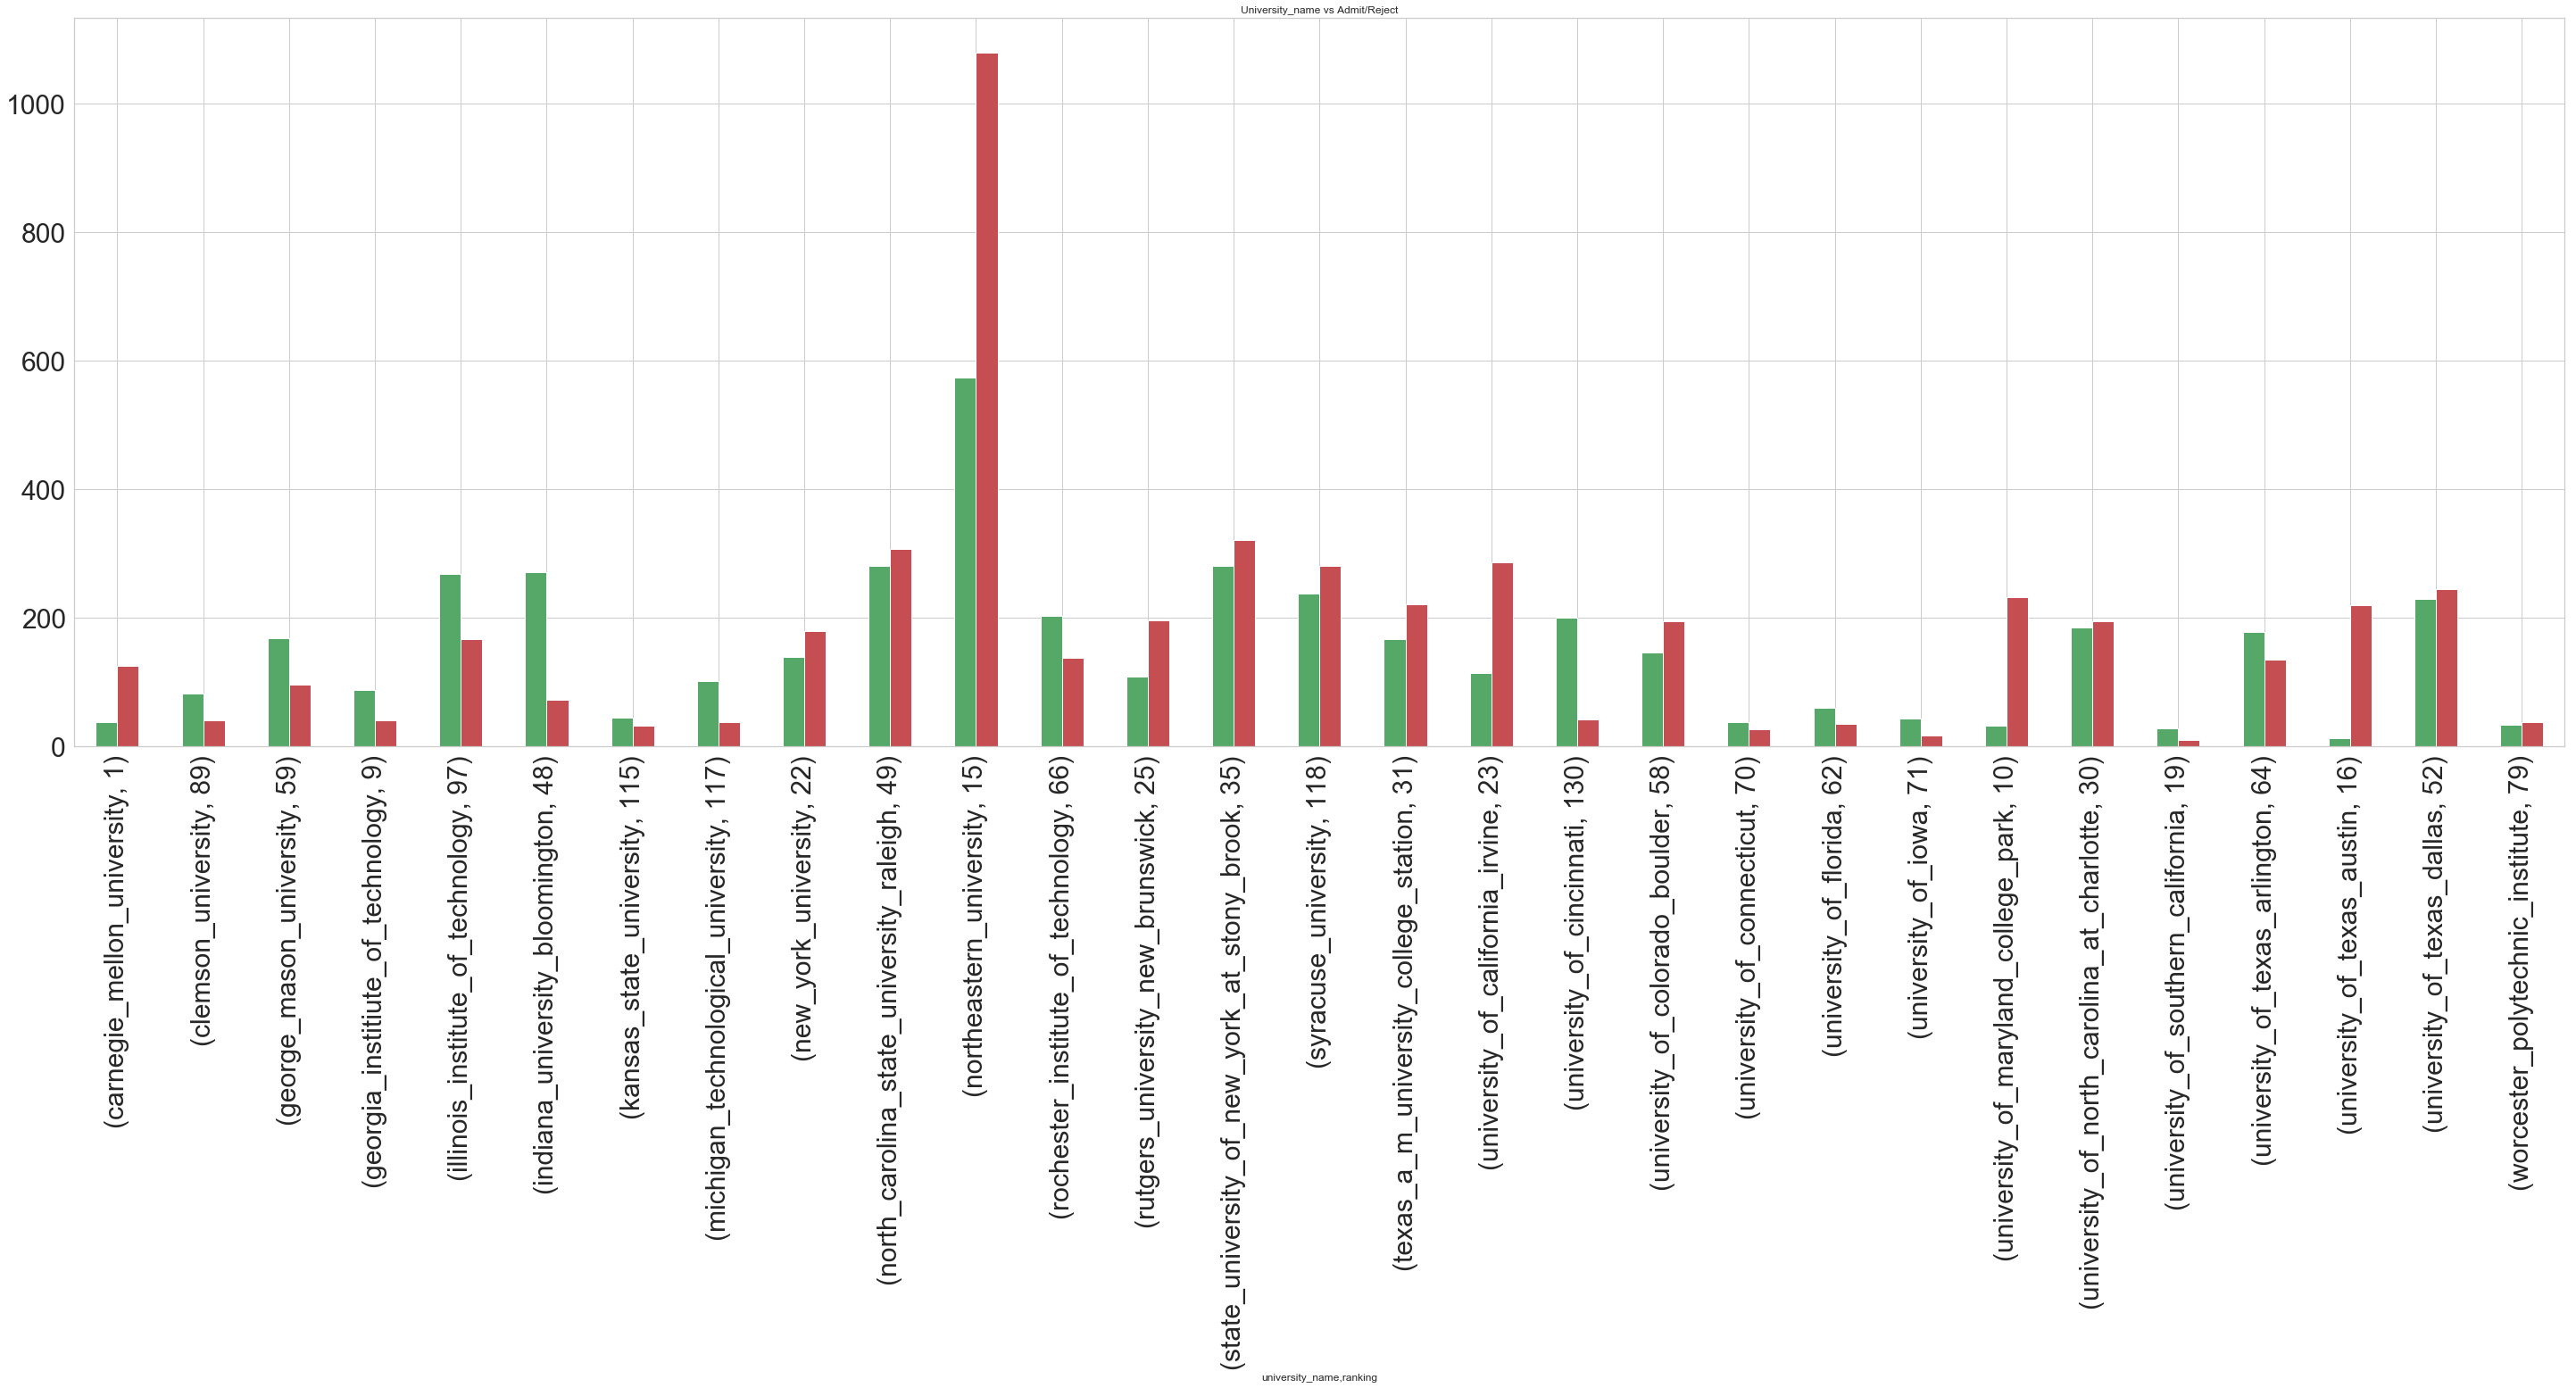

In [101]:
dataset.groupby(['university_name','ranking','status'])['status'].count().unstack().plot(title = 'University_name vs Admit/Reject',fontsize = 30,figsize=(50,15),kind='bar', legend=False, color=['g', 'r'])

Here in the above graph, we have 2 color code to represent accept and reject:
- green : acceptance to a collge
- red : rejection from a college

The dataset has accepts and decline on all the universities.

These are the list of 5 colleges with the most number of applicant(accept and reject combined)
 
 - northeastern_university - 1653
 - state_university_of_new_york_at_stony_brook - 602
 - north_carolina_state_university_raleigh - 588
 - syracuse_university - 518
 - university_of_texas_dallas - 474

<b> GRE Scores </b>

In [19]:
dataset.groupby(['university_name','status'])['gre_score_quant'].mean().unstack()

status                                           accept      reject
university_name                                                    
carnegie_mellon_university                   165.864865  166.944000
clemson_university                           160.060976  161.825000
george_mason_university                      160.505952  158.666667
georgia_institiute_of_technology             167.080460  166.750000
illinois_institute_of_technology             159.712687  157.688623
indiana_university_bloomington               162.841328  161.777778
kansas_state_university                      162.227273  160.312500
michigan_technological_university            160.821782  159.216216
new_york_university                          165.604317  163.513966
north_carolina_state_university_raleigh      166.879004  163.550489
northeastern_university                      163.026132  162.115848
rochester_institute_of_technology            161.901478  158.282609
rutgers_university_new_brunswick             166.990741  163.994898
state_university_of_new_york_at_stony_brook  165.928826  164.065421
syracuse_university                          161.705882  160.114286
texas_a_m_university_college_station         167.680723  165.049774
university_of_california_irvine              166.929825  165.181818
university_of_cincinnati                     160.855000  159.928571
university_of_colorado_boulder               164.116438  163.502564
university_of_connecticut                    162.947368  159.615385
university_of_florida                        163.933333  163.200000
university_of_iowa                           162.348837  158.875000
university_of_maryland_college_park          165.281250  165.469828
university_of_north_carolina_at_charlotte    160.162162  159.866667
university_of_southern_california            164.928571  165.900000
university_of_texas_arlington                158.449438  157.507463
university_of_texas_austin                   166.538462  166.372727
university_of_texas_dallas                   163.510917  161.220408
worcester_polytechnic_institute              161.515152  159.567568

# University name vs GRE Quant score (for both Admit and Reject)

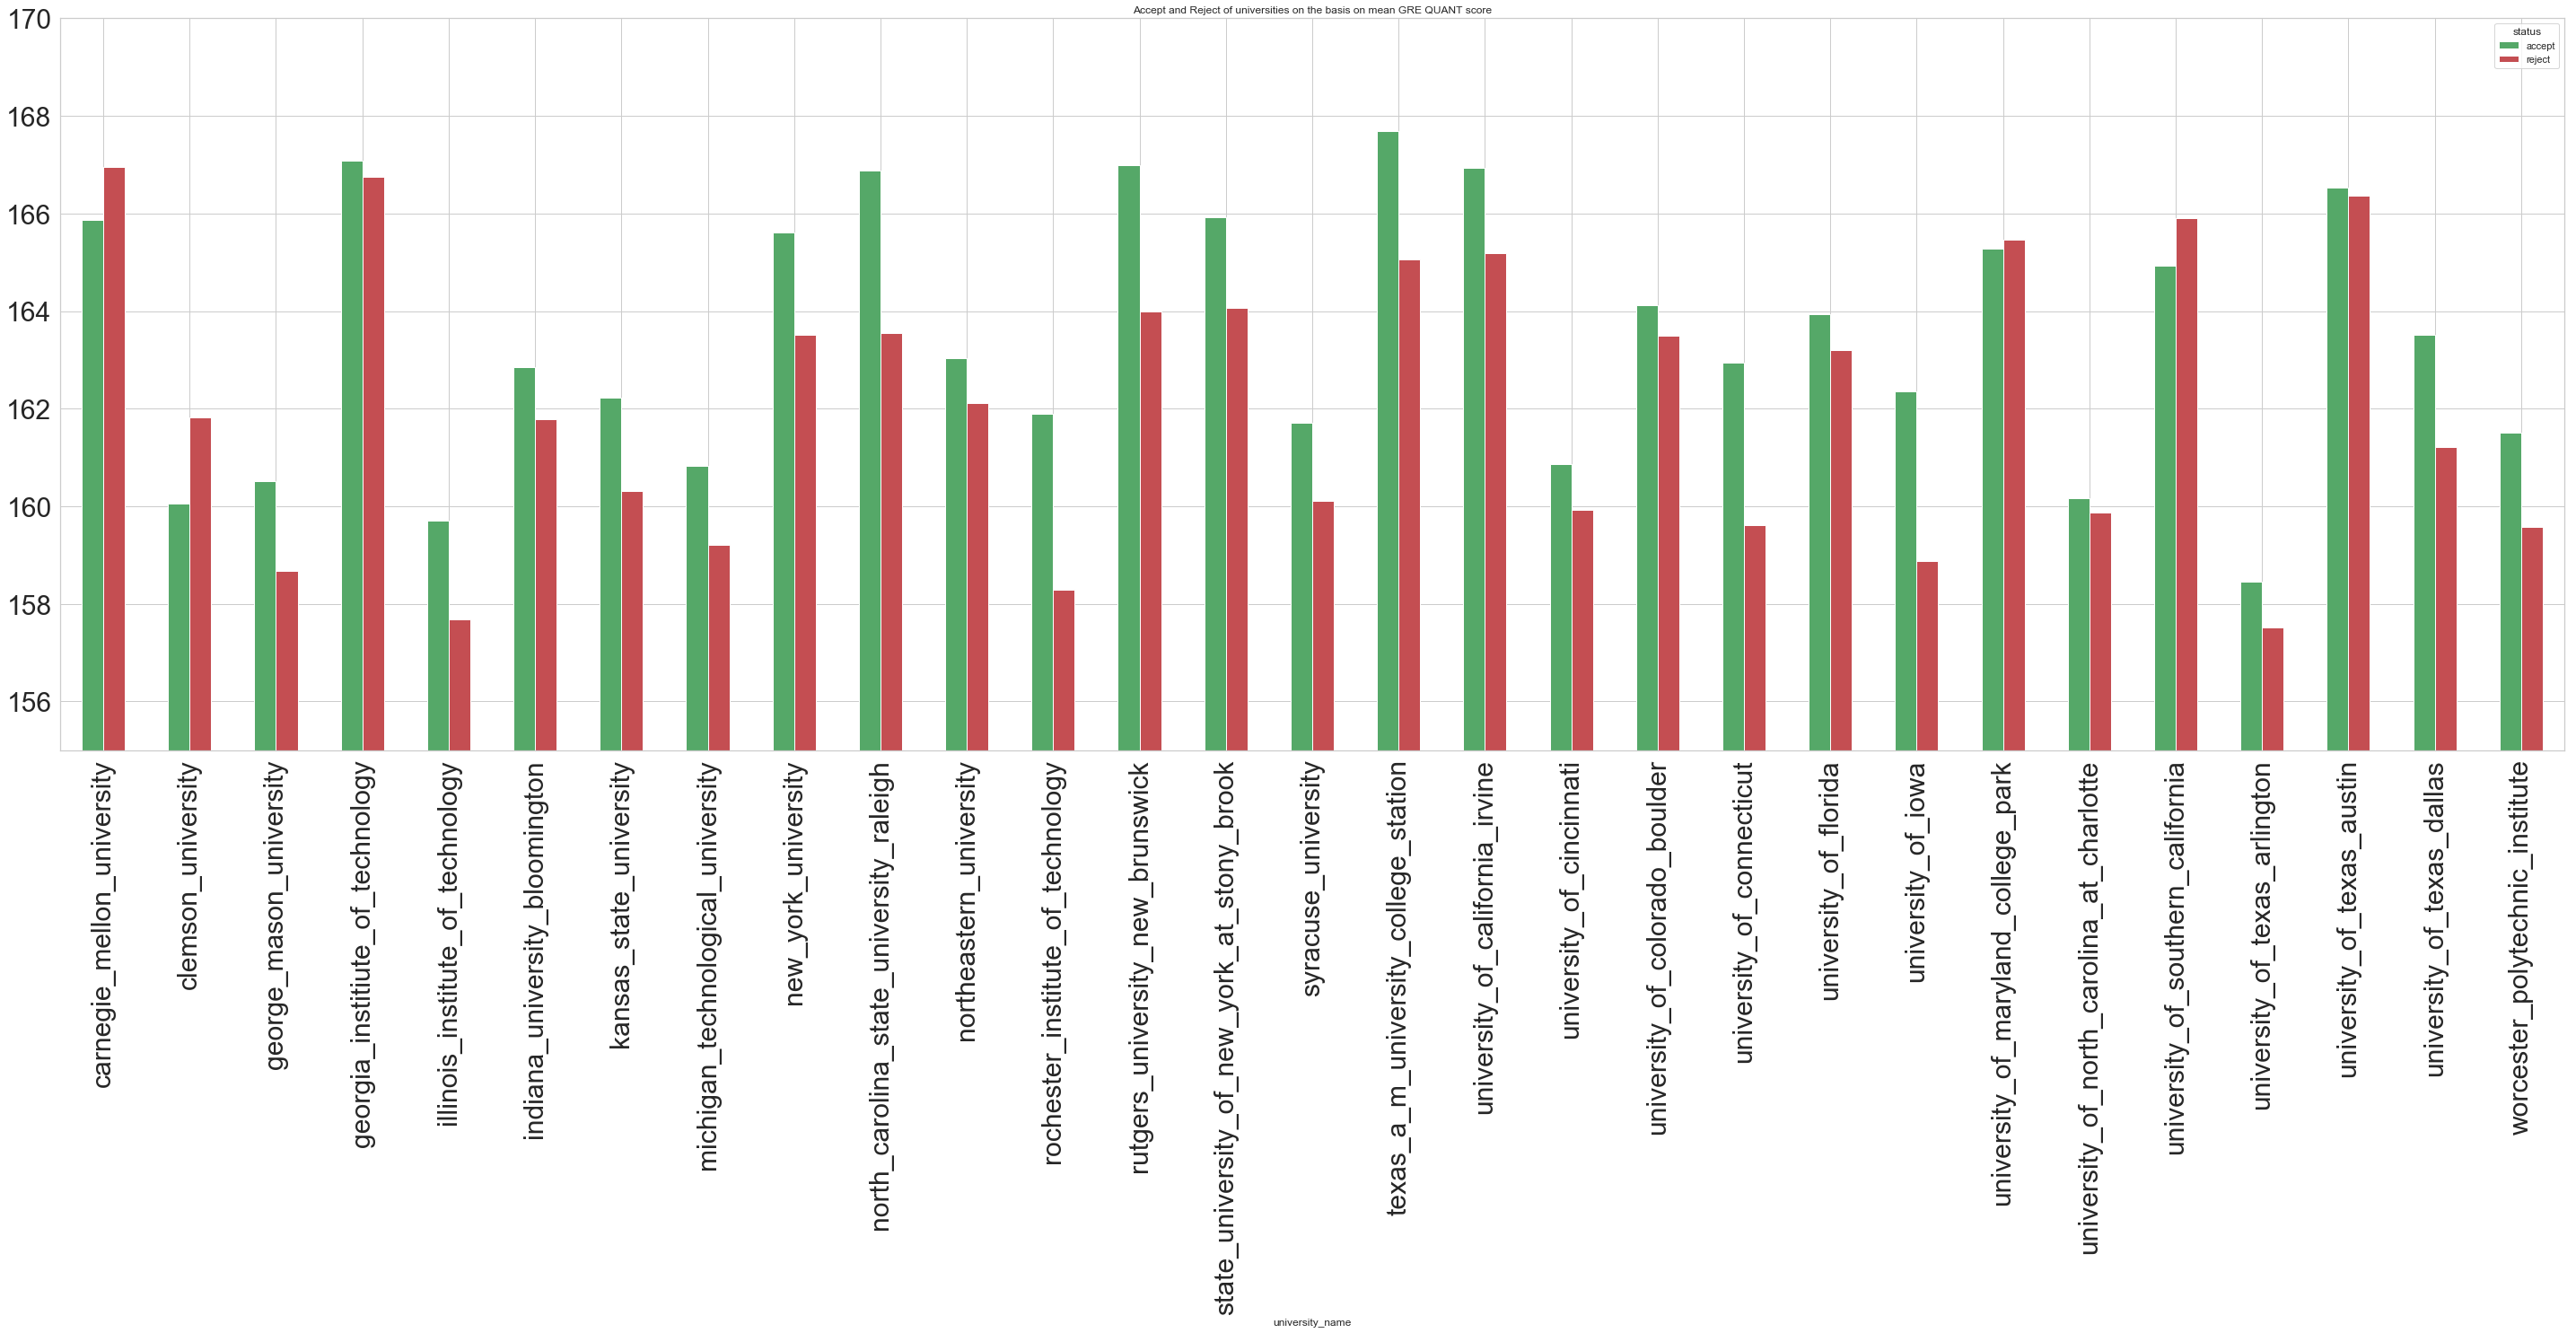

In [169]:
dataset.groupby(['university_name','status'])['gre_score_quant'].mean().unstack().plot(ylim = [155,170],title = 'Accept and Reject of universities on the basis on mean GRE QUANT score',fontsize = 30,figsize=(50,15),kind='bar', legend=True, color=['g','r'])


# University name vs GRE Verbal score (for both Admit and Reject)

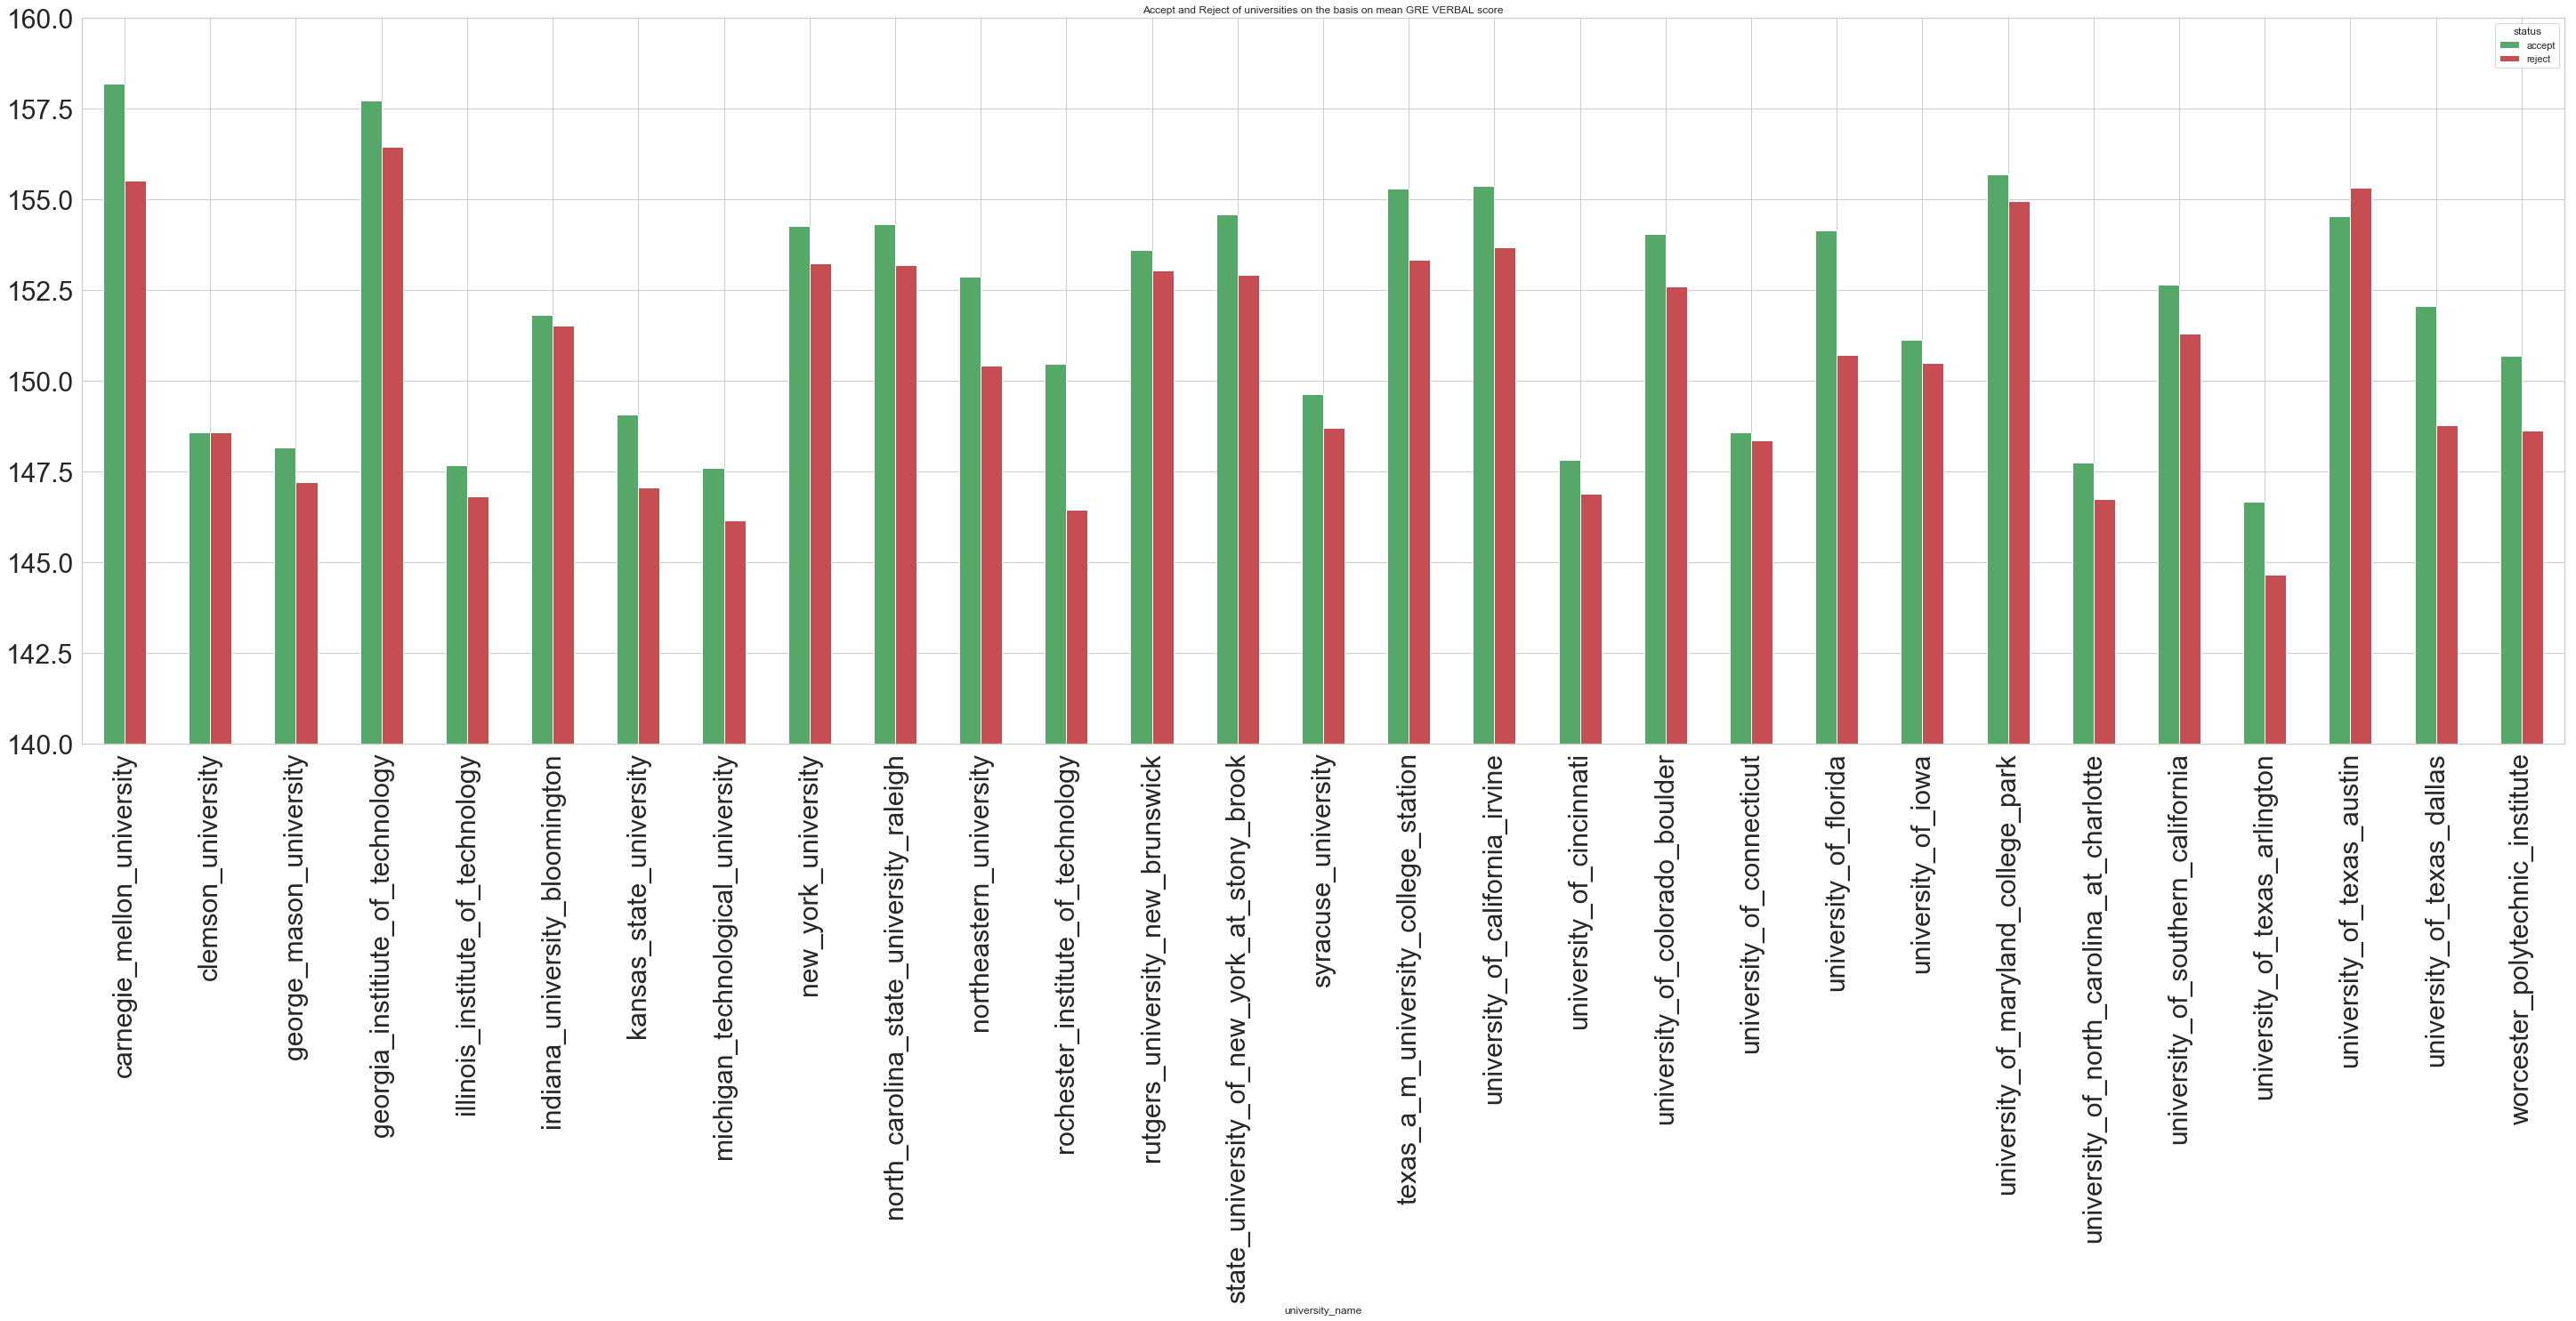

In [168]:
dataset.groupby(['university_name','status'])['gre_score_verbal'].mean().unstack().plot(ylim = [140,160],title = 'Accept and Reject of universities on the basis on mean GRE VERBAL score',fontsize = 30,figsize=(50,15),kind='bar', legend=True, color=['g','r'])

- For the GRE Verbal Score and GRE Quant Score <br>
The avarage of GRE VERBAL are high for these universities:
 - carnegie_mellon_university
 - georgia_institiute_of_technology
 - university_of_maryland_college_park
 - texas_a_m_university_college_station 

The avarage of GRE VERBAL are high for many universities. But some of the universities like mentioned below have more rejects with a higher quant score meinang that other features are more important than the GRE Quant score :
 - carnegie_mellon_university
 - university_of_southern_california


# University name vs GRE SCORE - Acccept students data (BOX PLOT)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

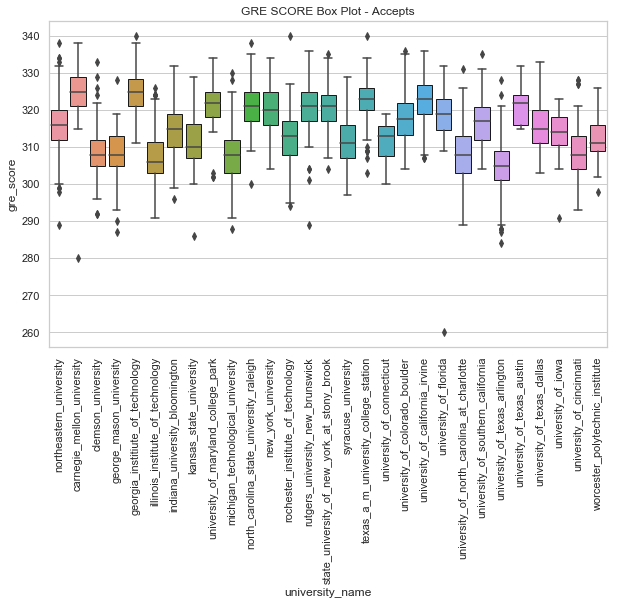

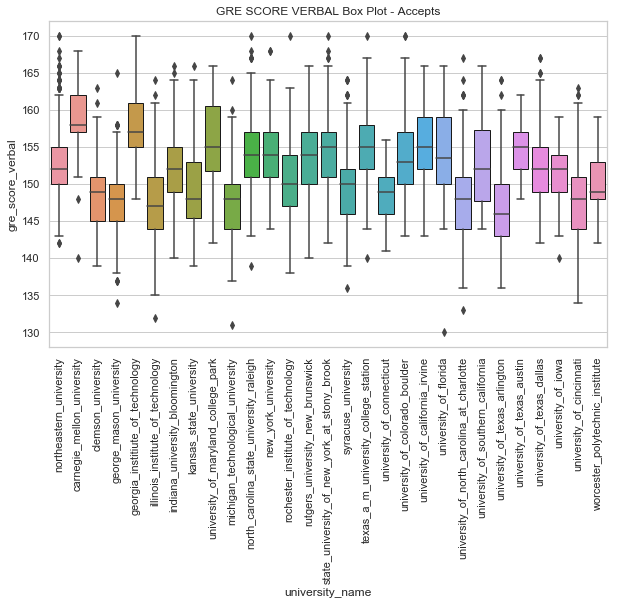

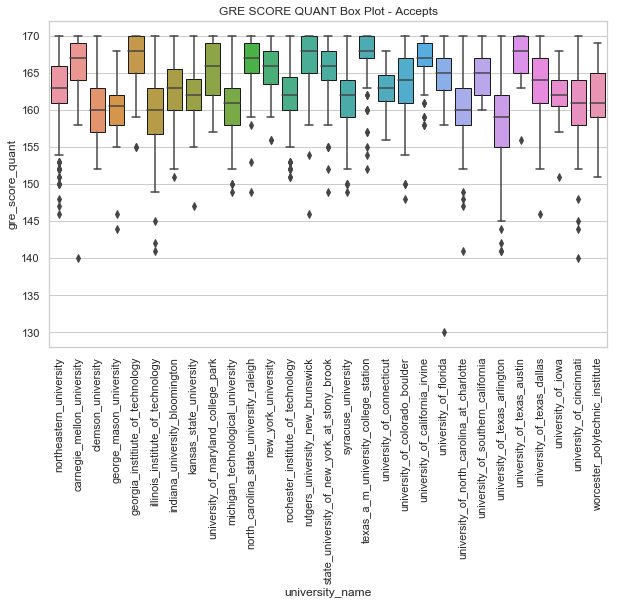

In [148]:
plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='university_name', y='gre_score', data=dataset[dataset['status']=='accept'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('GRE SCORE Box Plot - Accepts')
plt.xticks(rotation=90)

plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='university_name', y='gre_score_verbal', data=dataset[dataset['status']=='accept'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('GRE SCORE VERBAL Box Plot - Accepts')
plt.xticks(rotation=90)

plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='university_name', y='gre_score_quant', data=dataset[dataset['status']=='accept'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('GRE SCORE QUANT Box Plot - Accepts')
plt.xticks(rotation=90)

The above box plots have GRE VERBAL, GRE QUANT and GRE score for the various universities
The above box depicts the IQR Range: 
    - Q1(25th percentile)
    - Q2(median)
    - Q3(75th percentile)
it also depicts the value which are not in the IQR(Q3-Q1) range


For NEU, GRE Score for most of the admits is between 310-320 while Quant scores between (162-167)and Verbal scores (150-155)<br>
Also, for high profile universities like CMU, GaTech the IQR is high is varying between 320-330 GRE Scores, high Quants

    

# Highest GRE Score for each university(Admit and Reject combined)

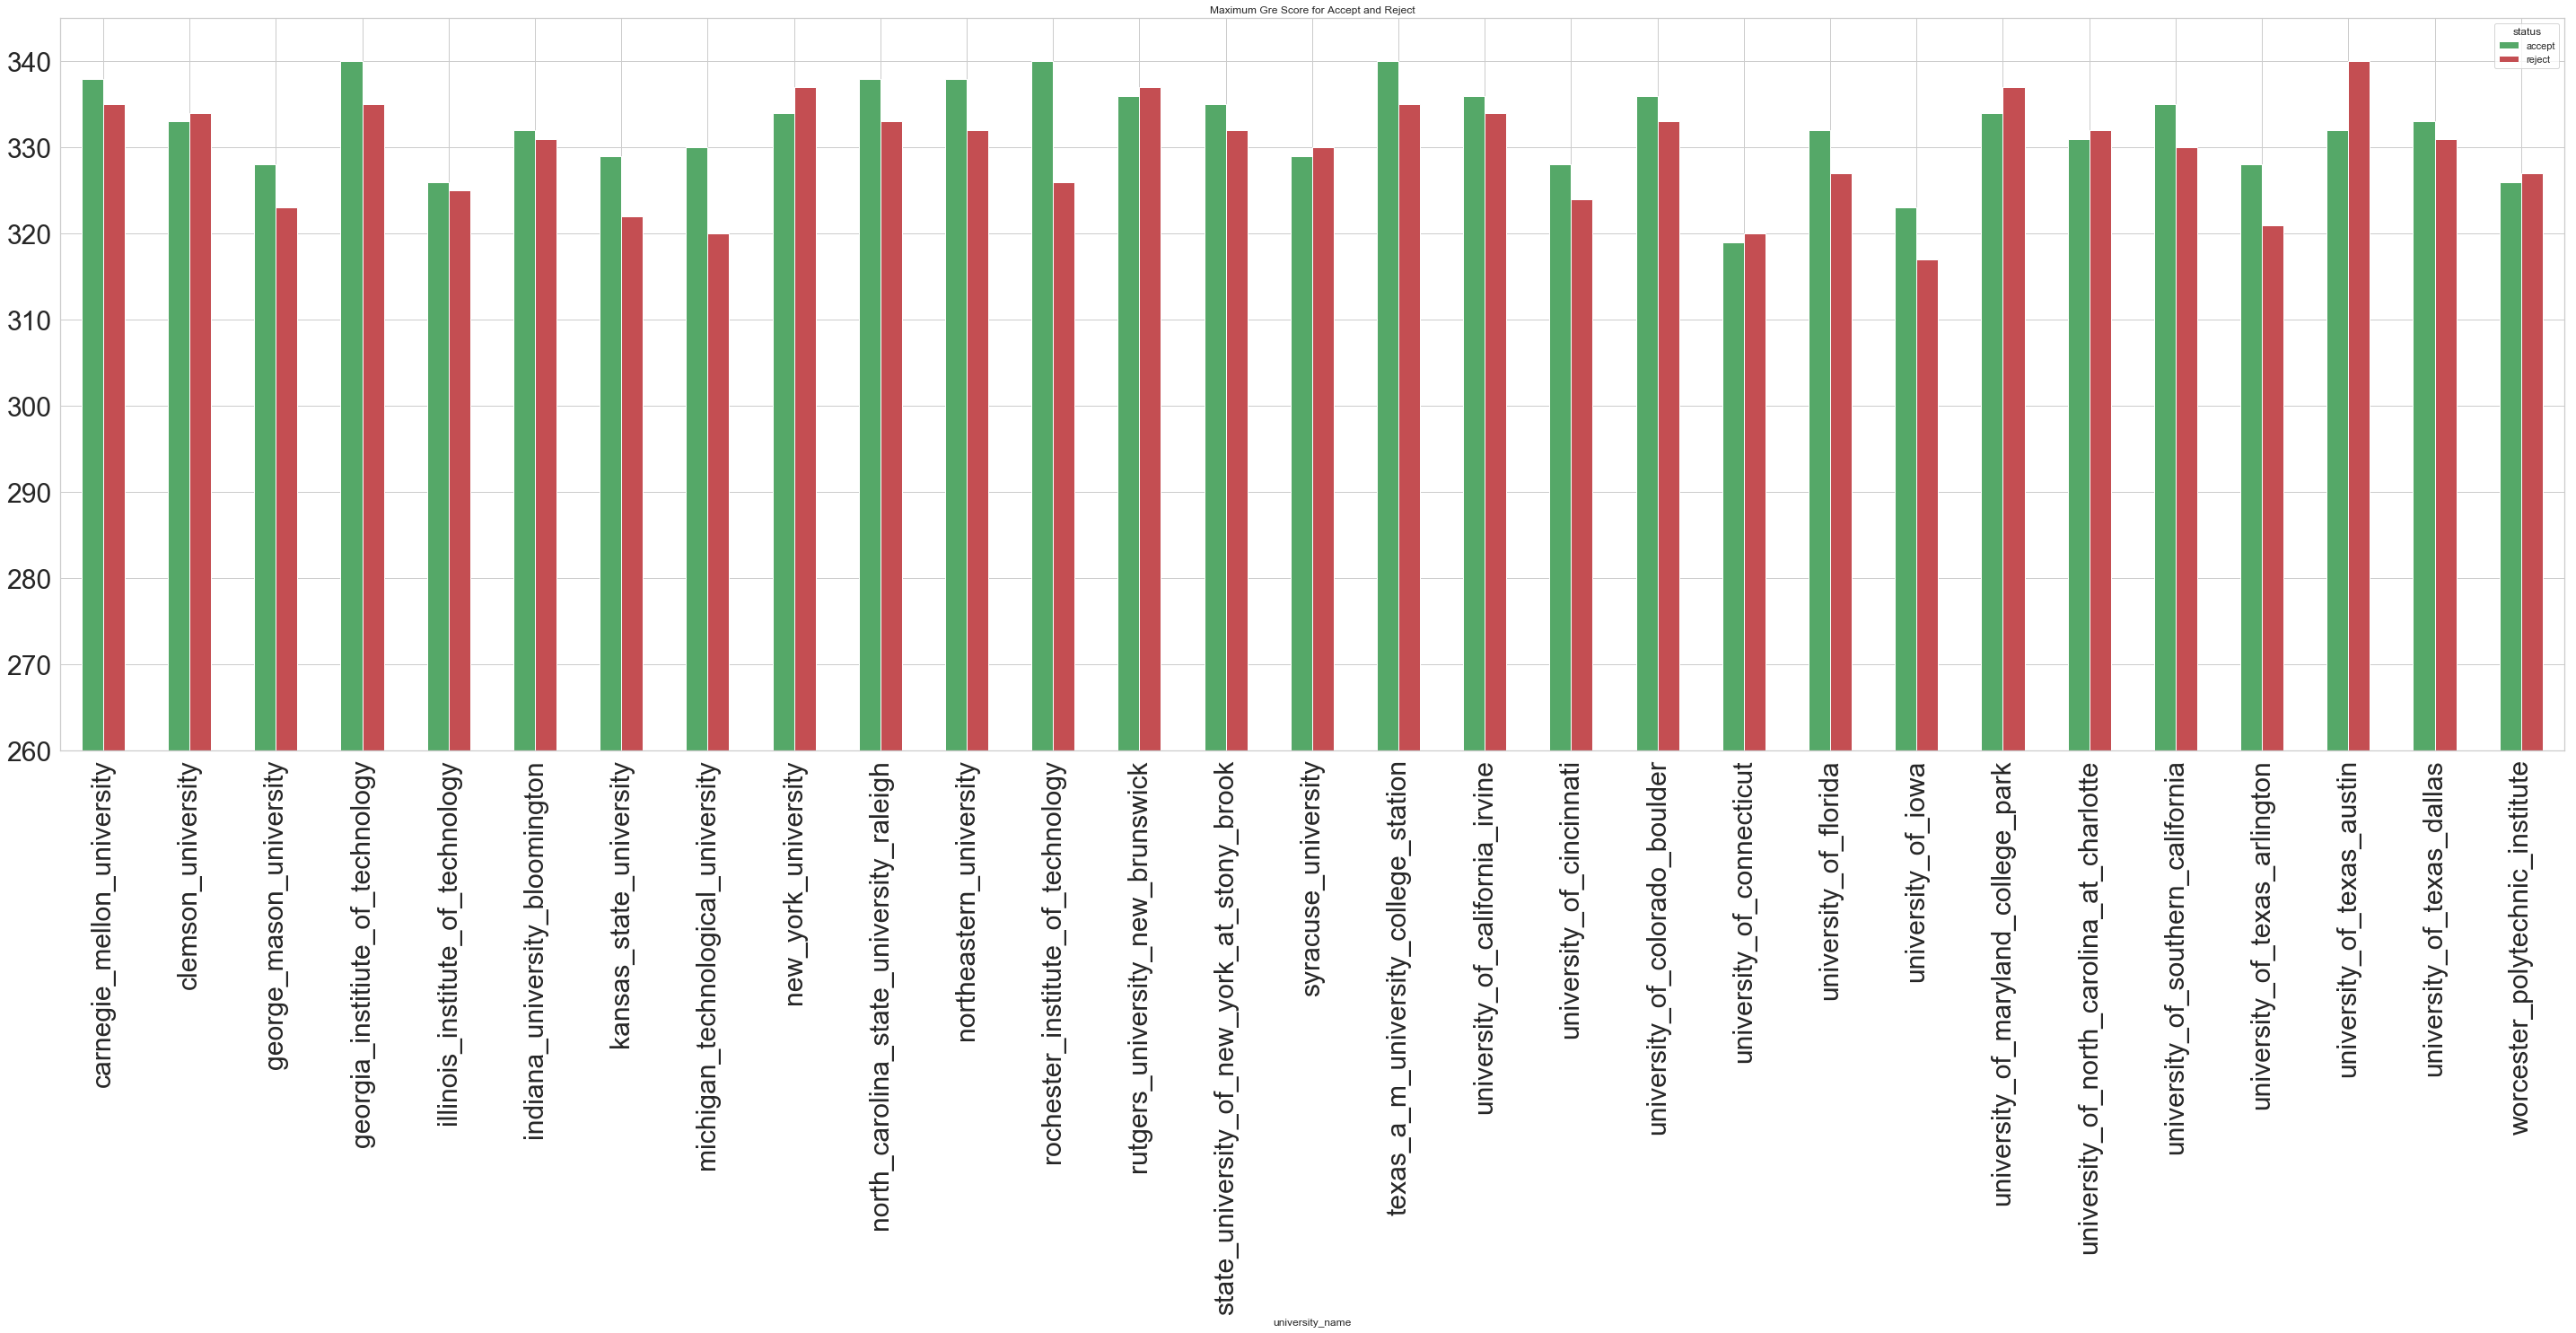

In [163]:
dataset['gre_score']
dataset.groupby(['university_name','status'])['gre_score'].max().unstack().plot(legend=True,ylim = [260,345],title = 'Maximum Gre Score for Accept and Reject',fontsize = 30,figsize=(50,15),kind='bar', color=['g','r'])


# Lowest Gre Score for each university(Admit and Reject combined)

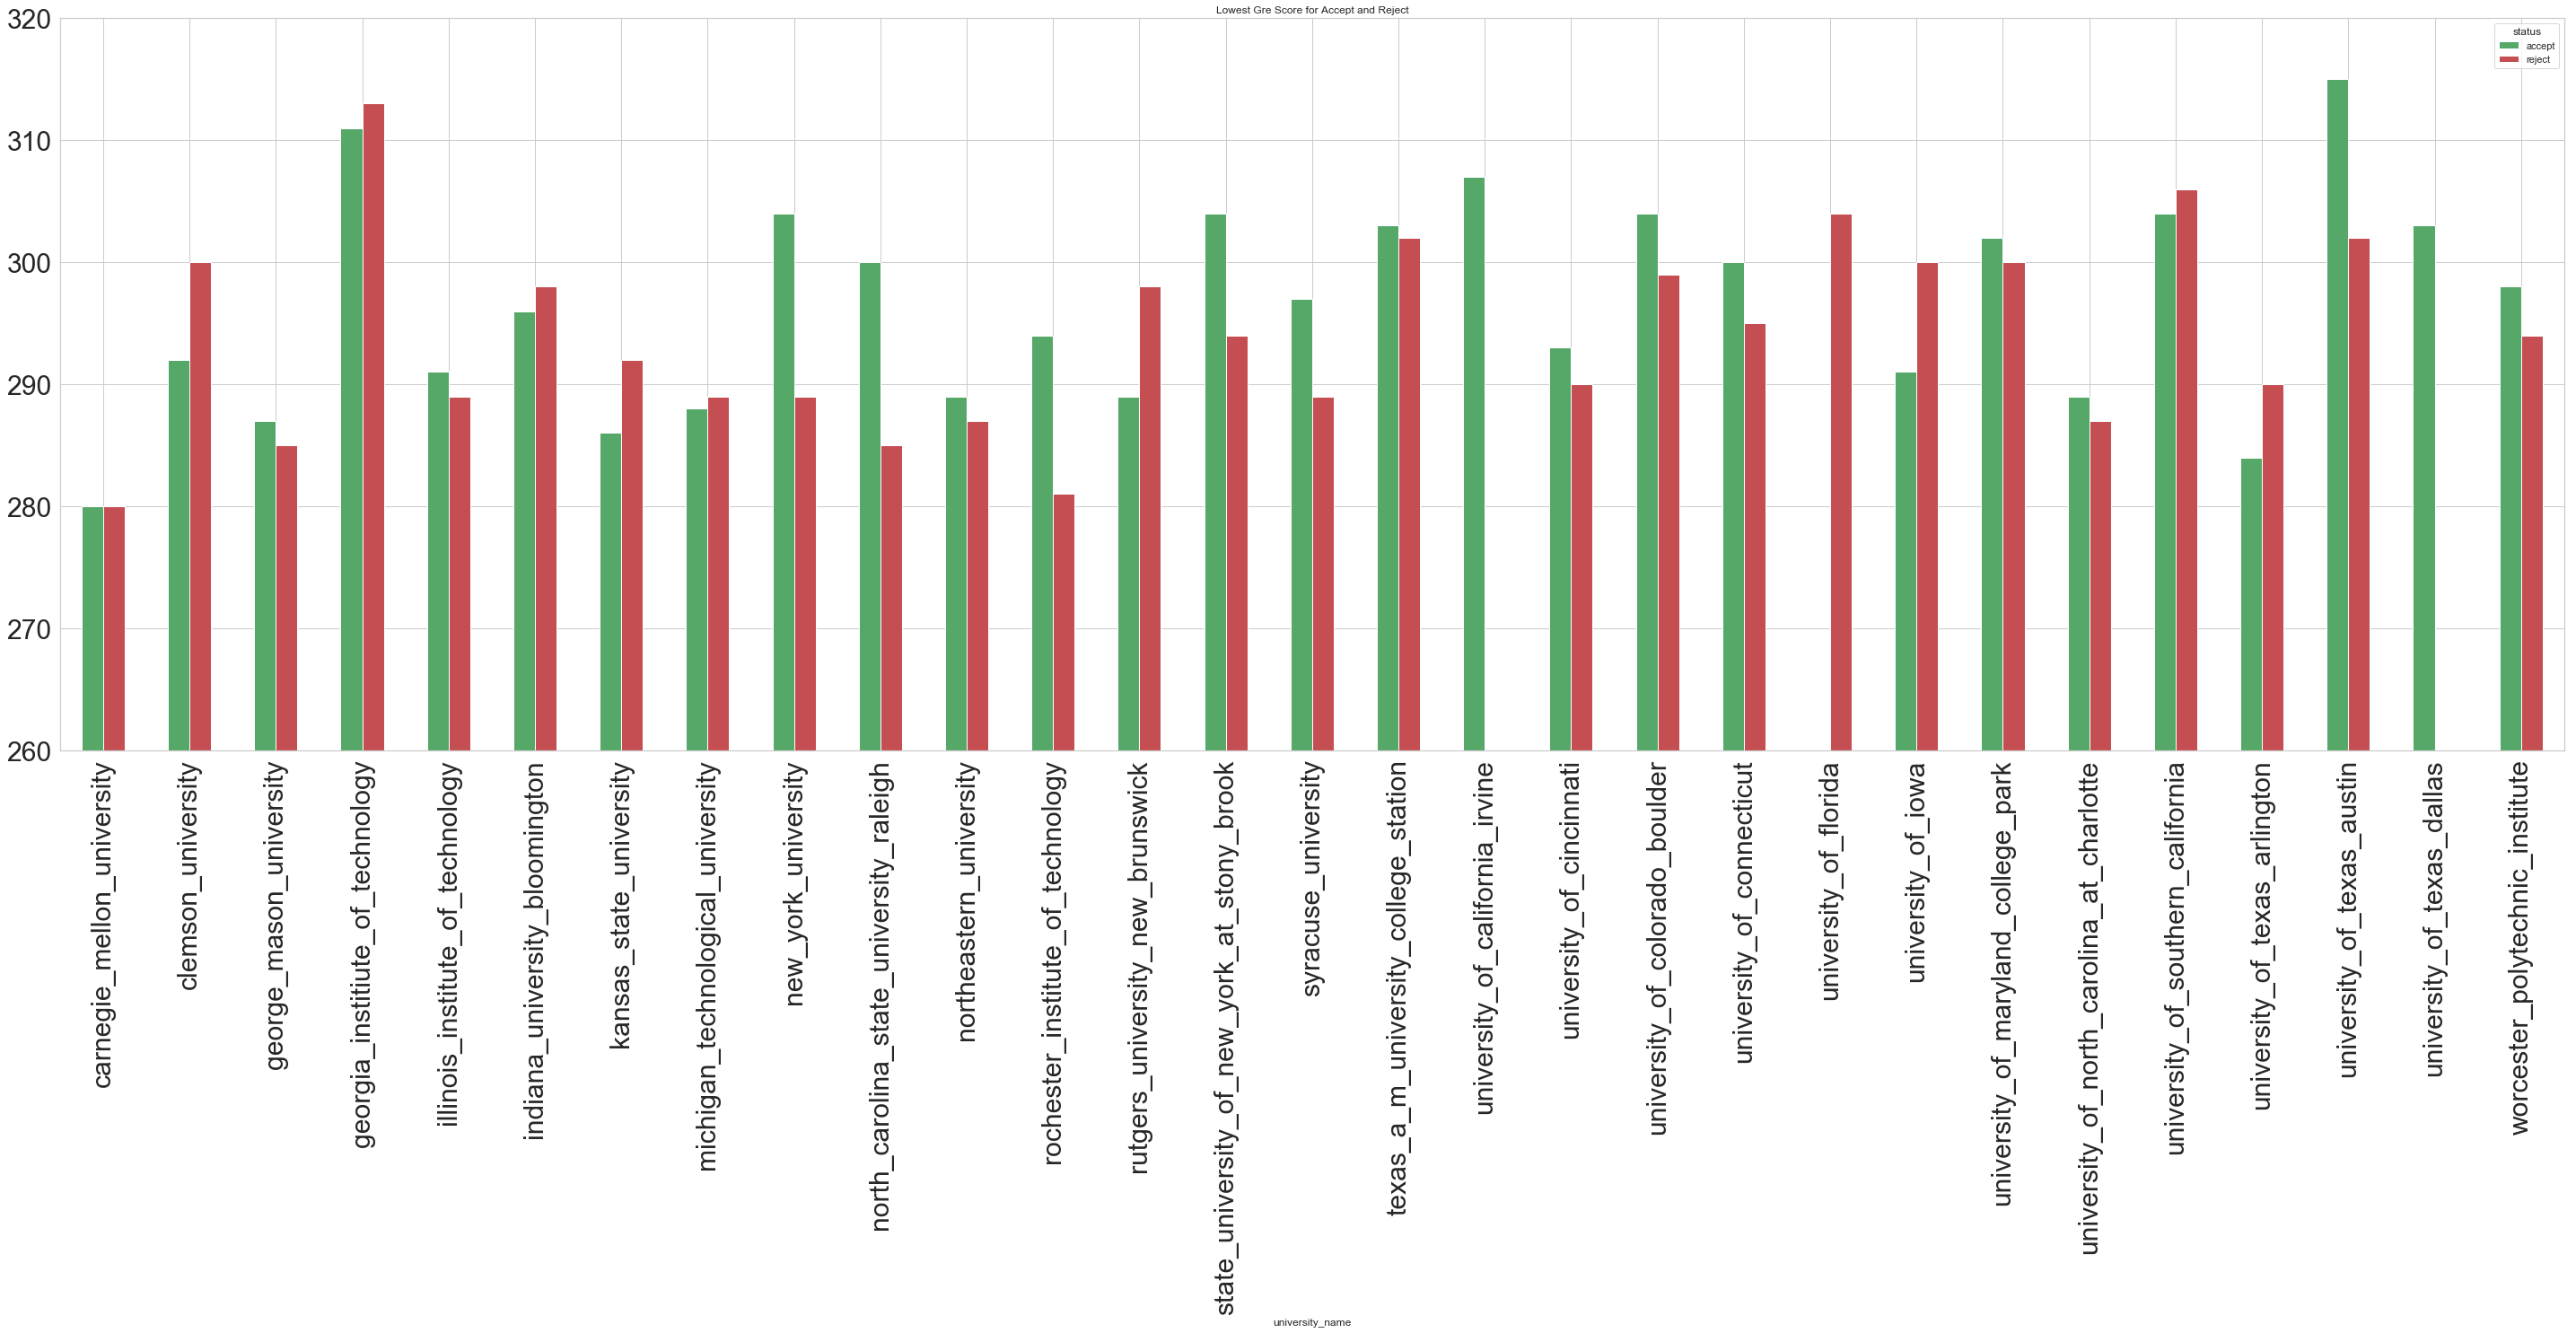

In [157]:
dataset['gre_score']
dataset.groupby(['university_name','status'])['gre_score'].min().unstack().plot(legend=True,ylim = [260,320],title = 'Lowest Gre Score for Accept and Reject',fontsize = 30,figsize=(50,15),kind='bar', color=['g','r'])


In the above graph, we have found out the mean of the GRE Verbal and GE Quant score for universities.<br>
Color code used was:
- Green : accept
- Red : Reject

<b> Work Experience </b>

In [24]:
dataset['work_ex'].unique()

array([  9,   7,  36,  48,  30,   0,  12,   8,   4,   6,  13,   5,  20,
        33,  25,  24,   2,  41,  28,  15,  11,  32,  19,   1,  50,   3,
        10,  16,  60,  17,  43,  31,  22,  14,  27,  44,  18,  26,  55,
        46,  52,  49,  82,  38,  58,  51,  29,  39,  69,  40,  21,  45,
        42,  23,  67,  35,  34,  37,  53,  90,  61,  94,  68,  47,  57,
        70,  78,  54,  56,  66,  75,  72,  77, 132,  63,  65,  79,  74,
        62,  92, 110,  59,  86,  85,  64,  98, 112, 153], dtype=int64)

# University vs Work experience(in months) (accept and Reject)

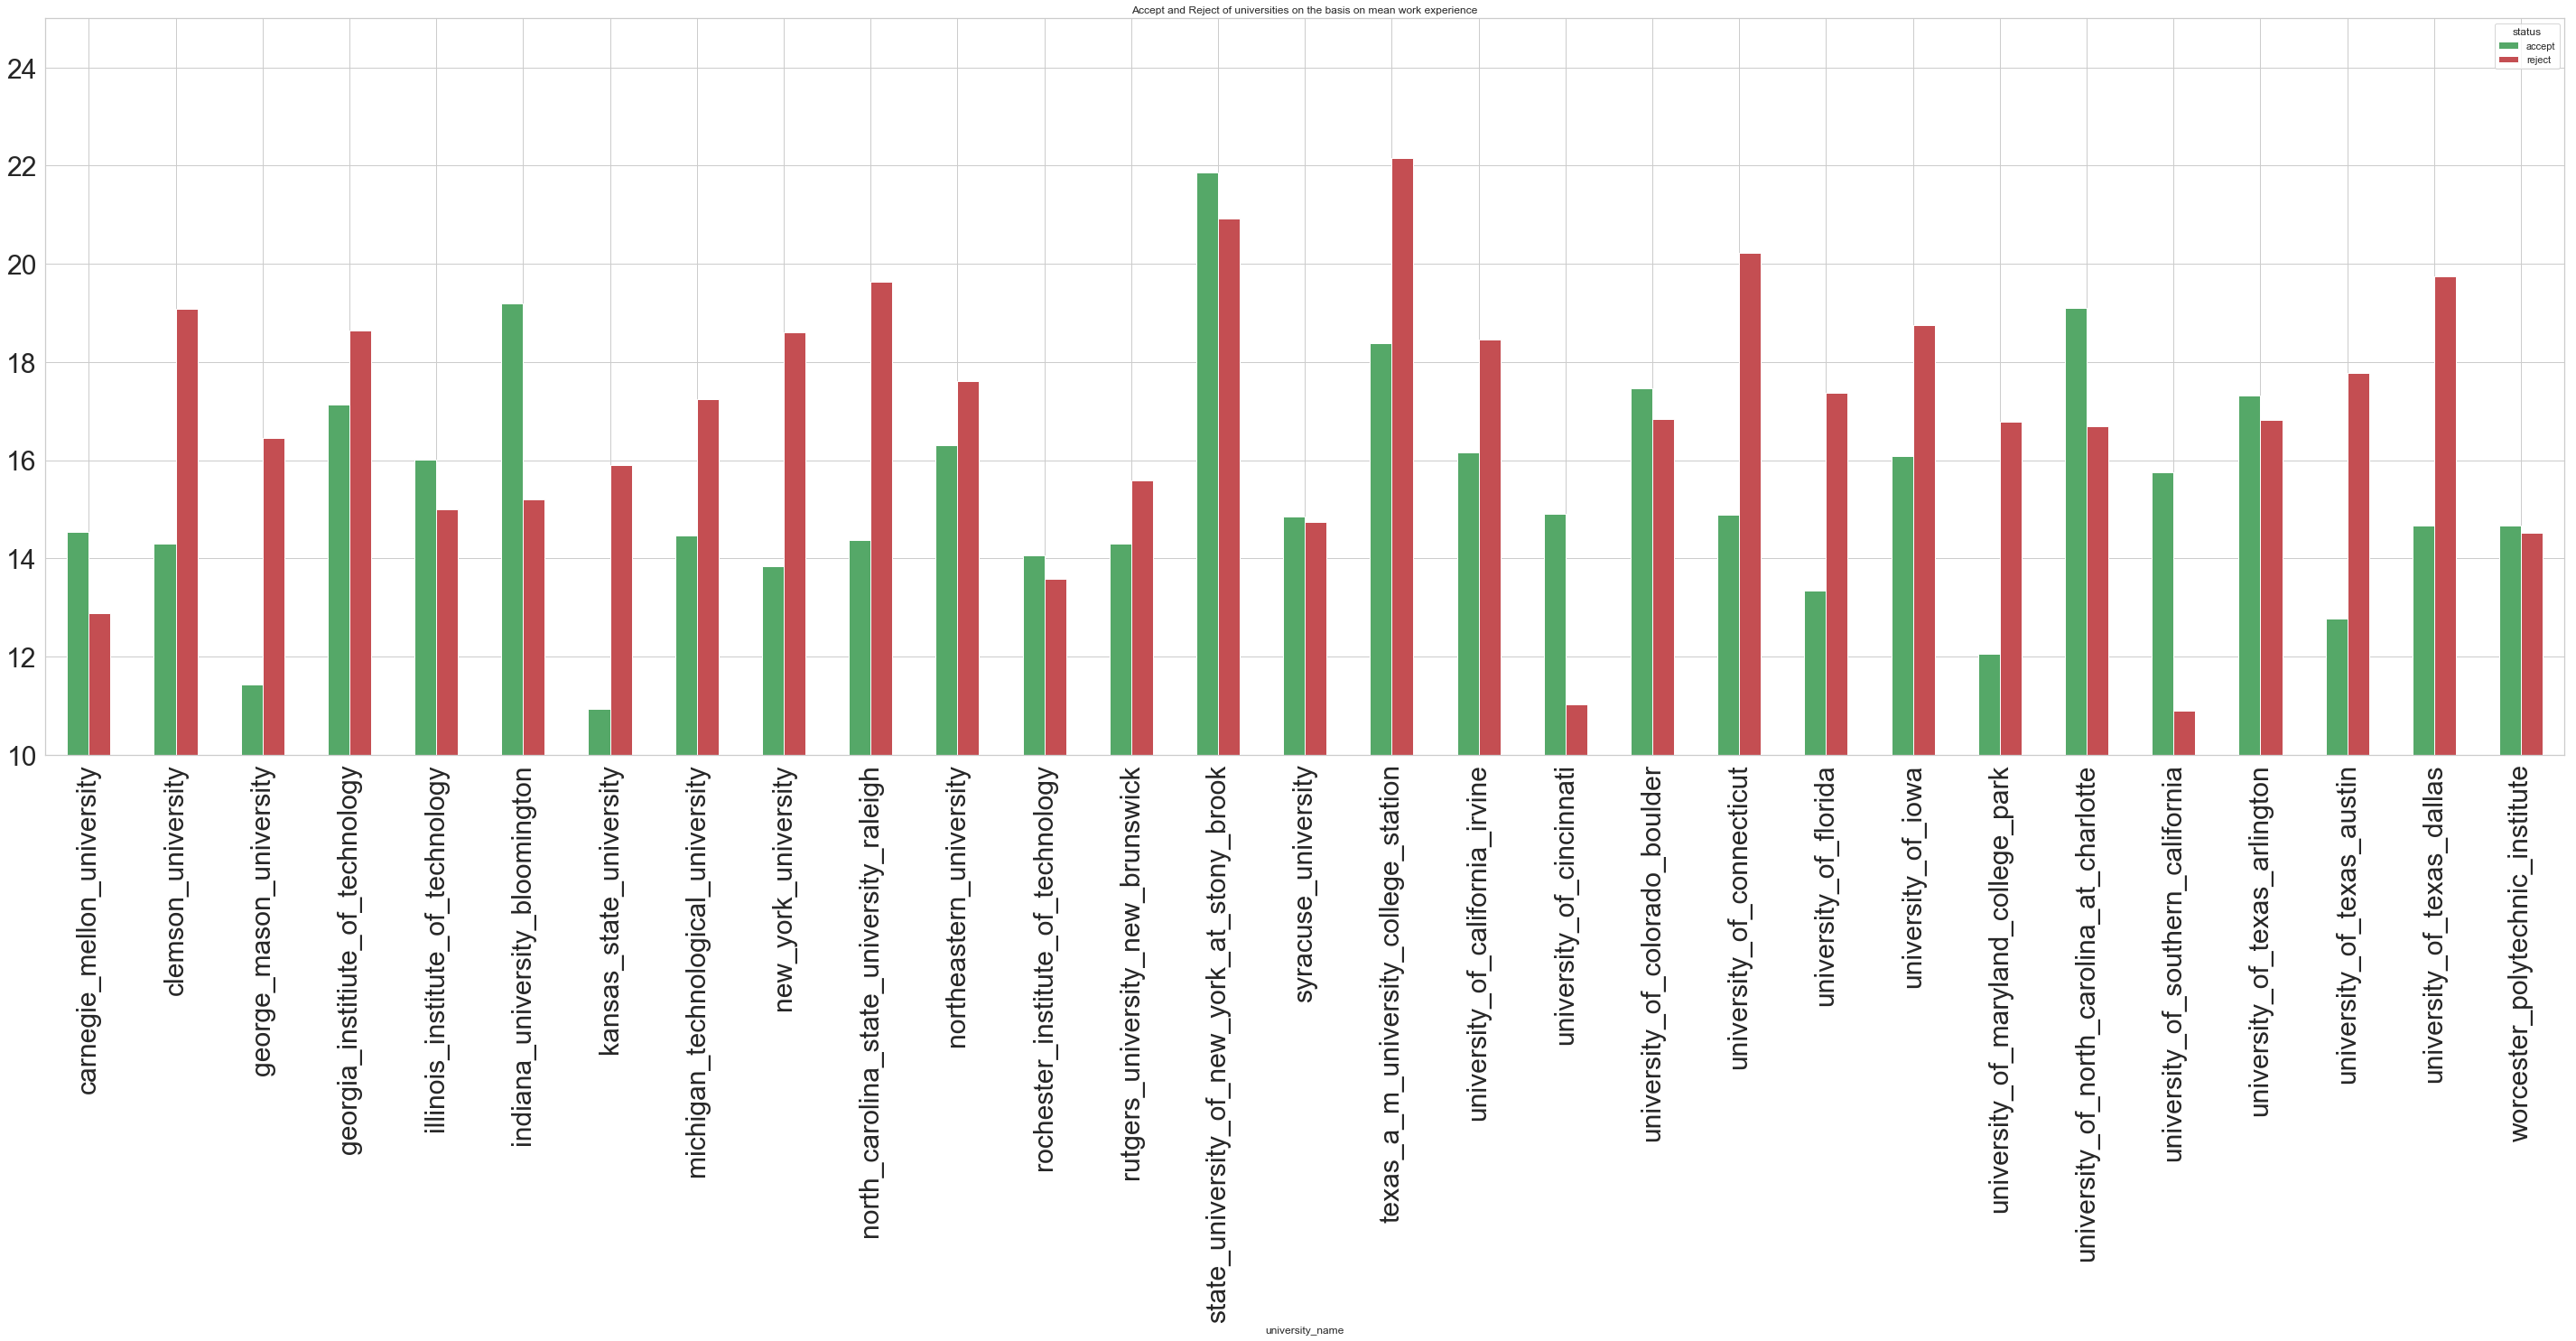

In [130]:
dataset.groupby(['university_name','status'])['work_ex'].mean().unstack().plot(legend=True,ylim = [10,25],title = 'Accept and Reject of universities on the basis on mean work experience',fontsize = 30,figsize=(50,15),kind='bar', color=['g','r'])


The above bar chart displays the work expierence for multiple universities.<br>
It depicts that for some of the universities the applicants with more experience are given weightage, while for the other universities it is observed that work experience being high also turns out in rejection of the applicant.

In [26]:
work_ex_list = dataset['work_ex'].tolist()

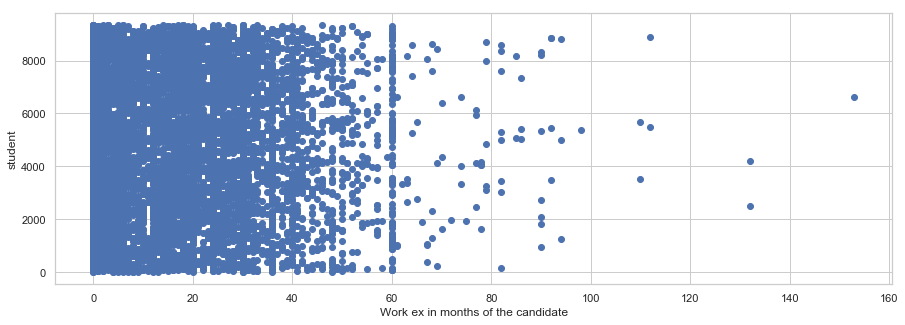

In [164]:
plt.figure(figsize=(15,5))
plt.xlabel('Work ex in months of the candidate')
plt.ylabel('student')
plt.scatter(work_ex_list, np.arange(0,9350))

Work experience for most of the candidates are between 0-40 months. <br>
Some of the work experience of the candiadates are above 60 months.

<b> Undergraduate Score </b>

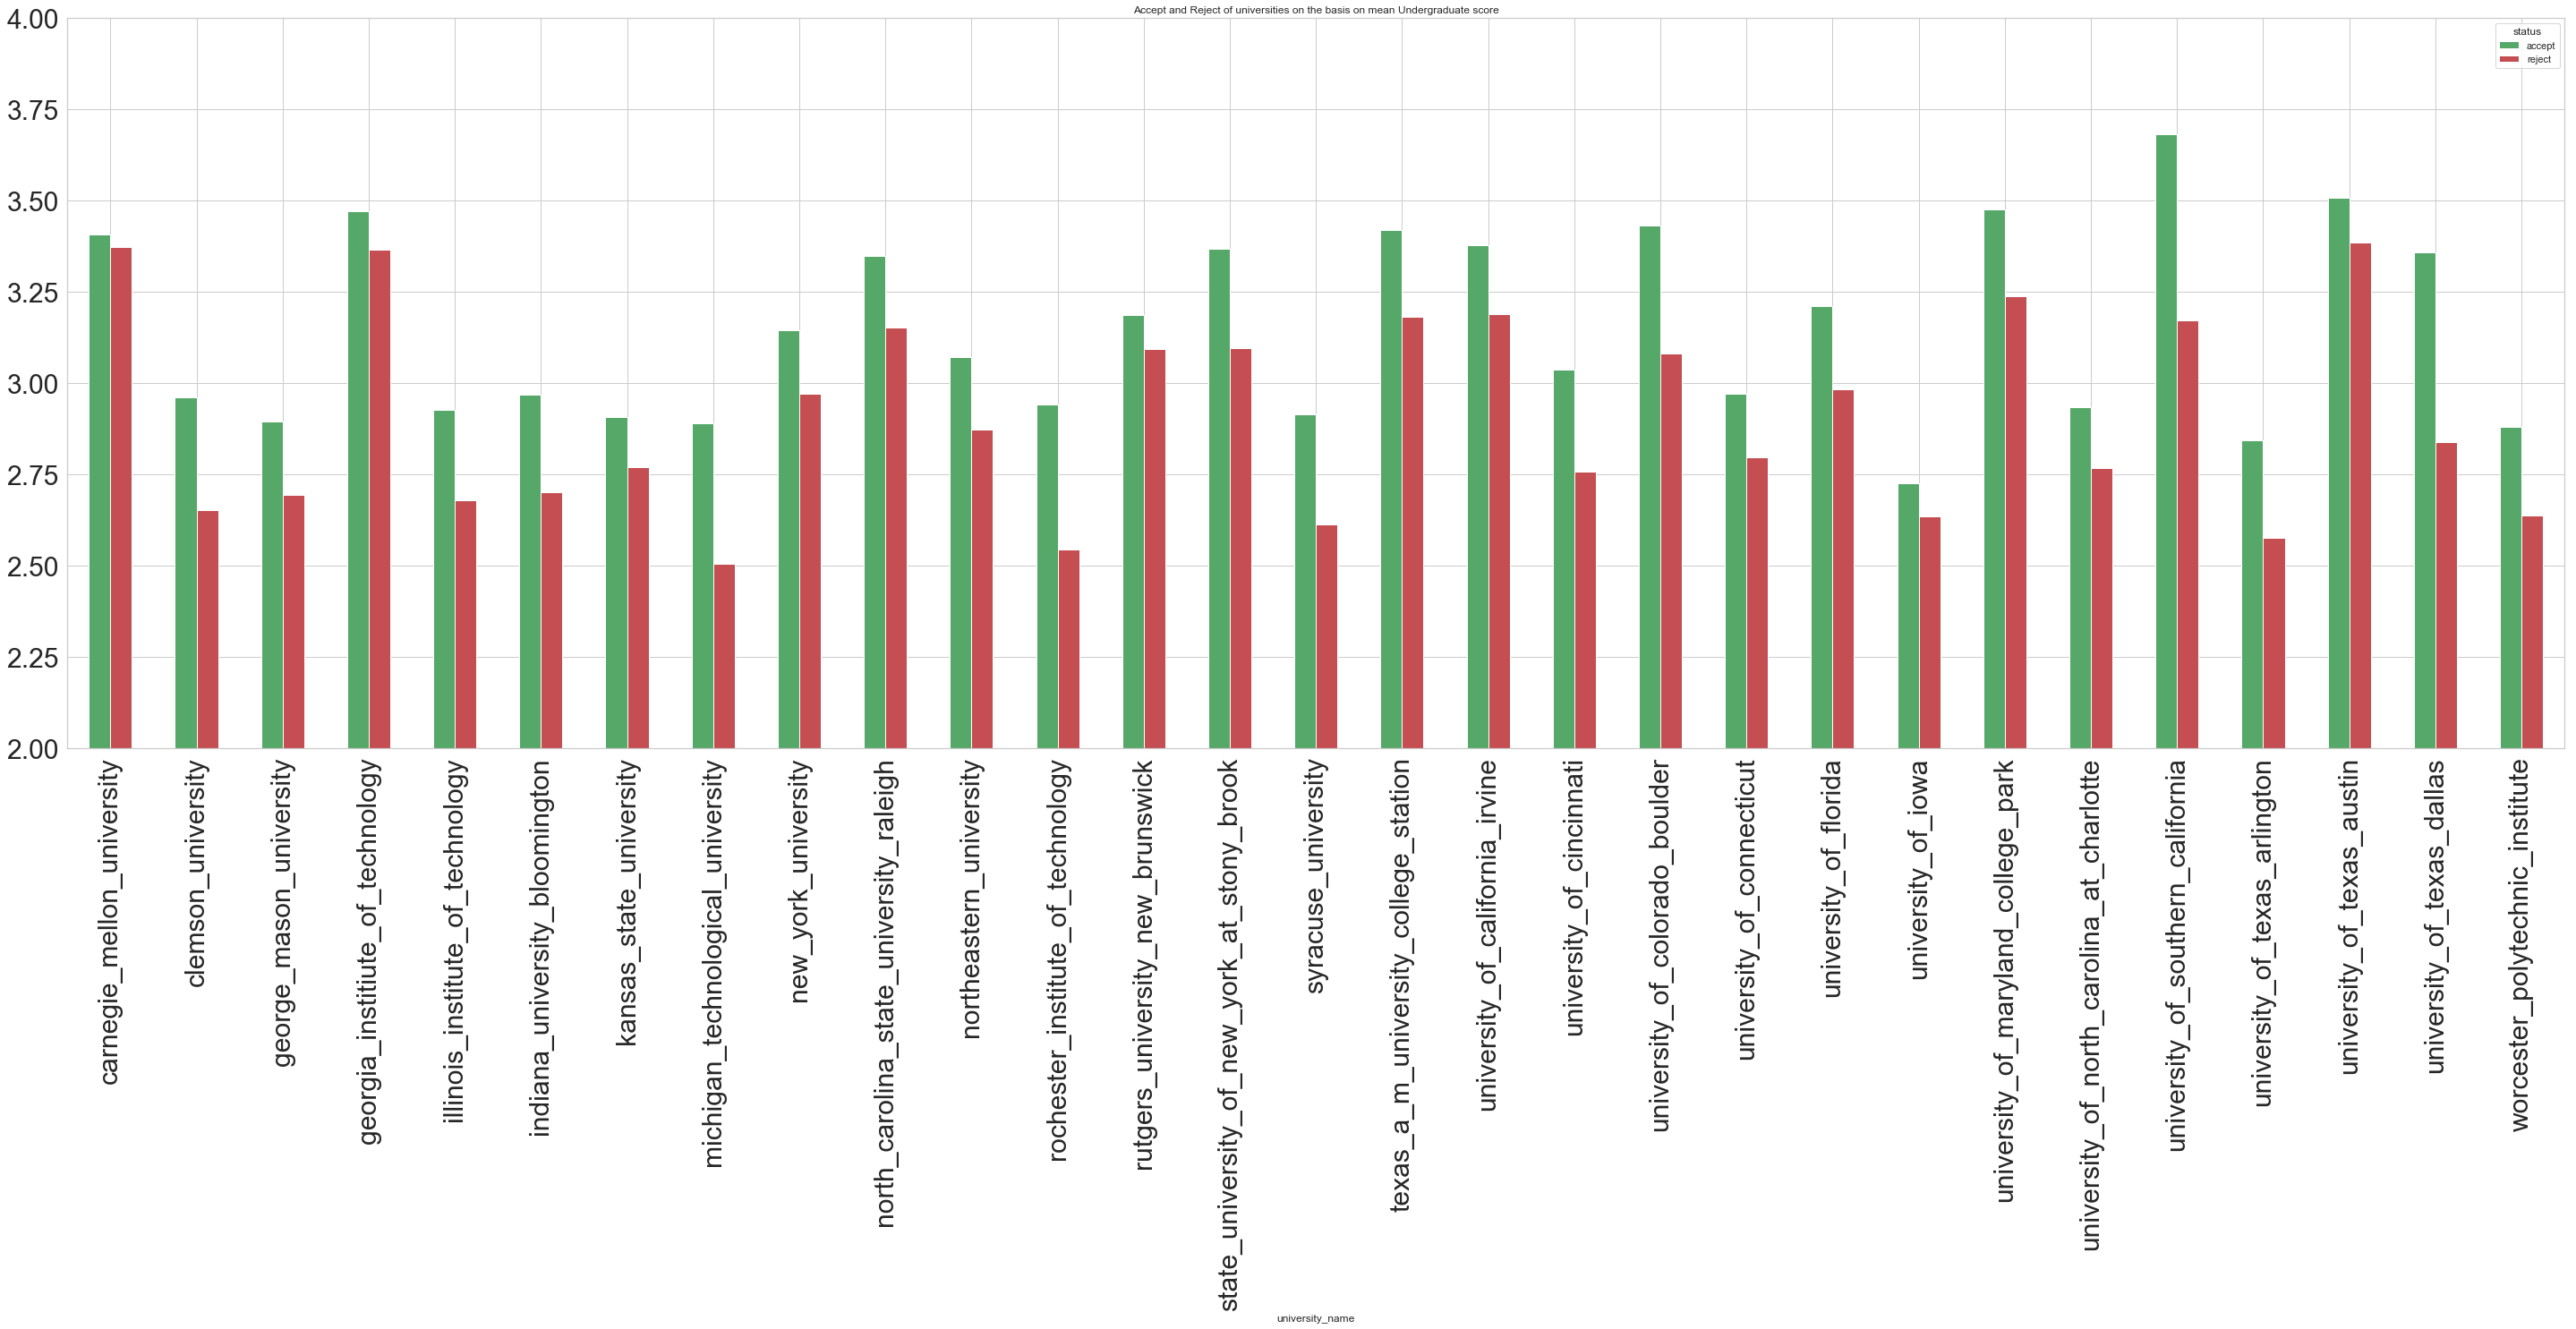

In [131]:
dataset.groupby(['university_name','status'])['undergraduation_score'].mean().unstack().plot(legend=True,ylim = [2,4],title = 'Accept and Reject of universities on the basis on mean Undergraduate score',fontsize = 30,figsize=(50,15),kind='bar', color=['g','r'])


- The accept for most of the universities are having a higher value of CGPA Score.So, it seems that CGPA have an influence on the admission.

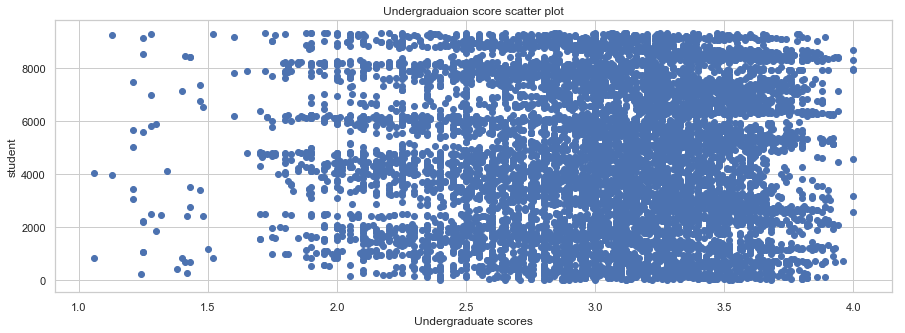

In [167]:
undergraduate_score = dataset['undergraduation_score'].tolist()
plt.figure(figsize=(15,5))
plt.xlabel('Undergraduate scores')
plt.ylabel('student')
plt.title('Undergraduaion score scatter plot')
plt.scatter(undergraduate_score, np.arange(0,9350))

The universities have a CGPA score mostly clustered from 2.75 to 3.5 <br>
The data is for the candidate for both the accept and reject

<b> Paper Published </b>

In [29]:
dataset['papers_published'].unique()

array([3, 0, 1, 2], dtype=int64)

# University vs Count of paper published

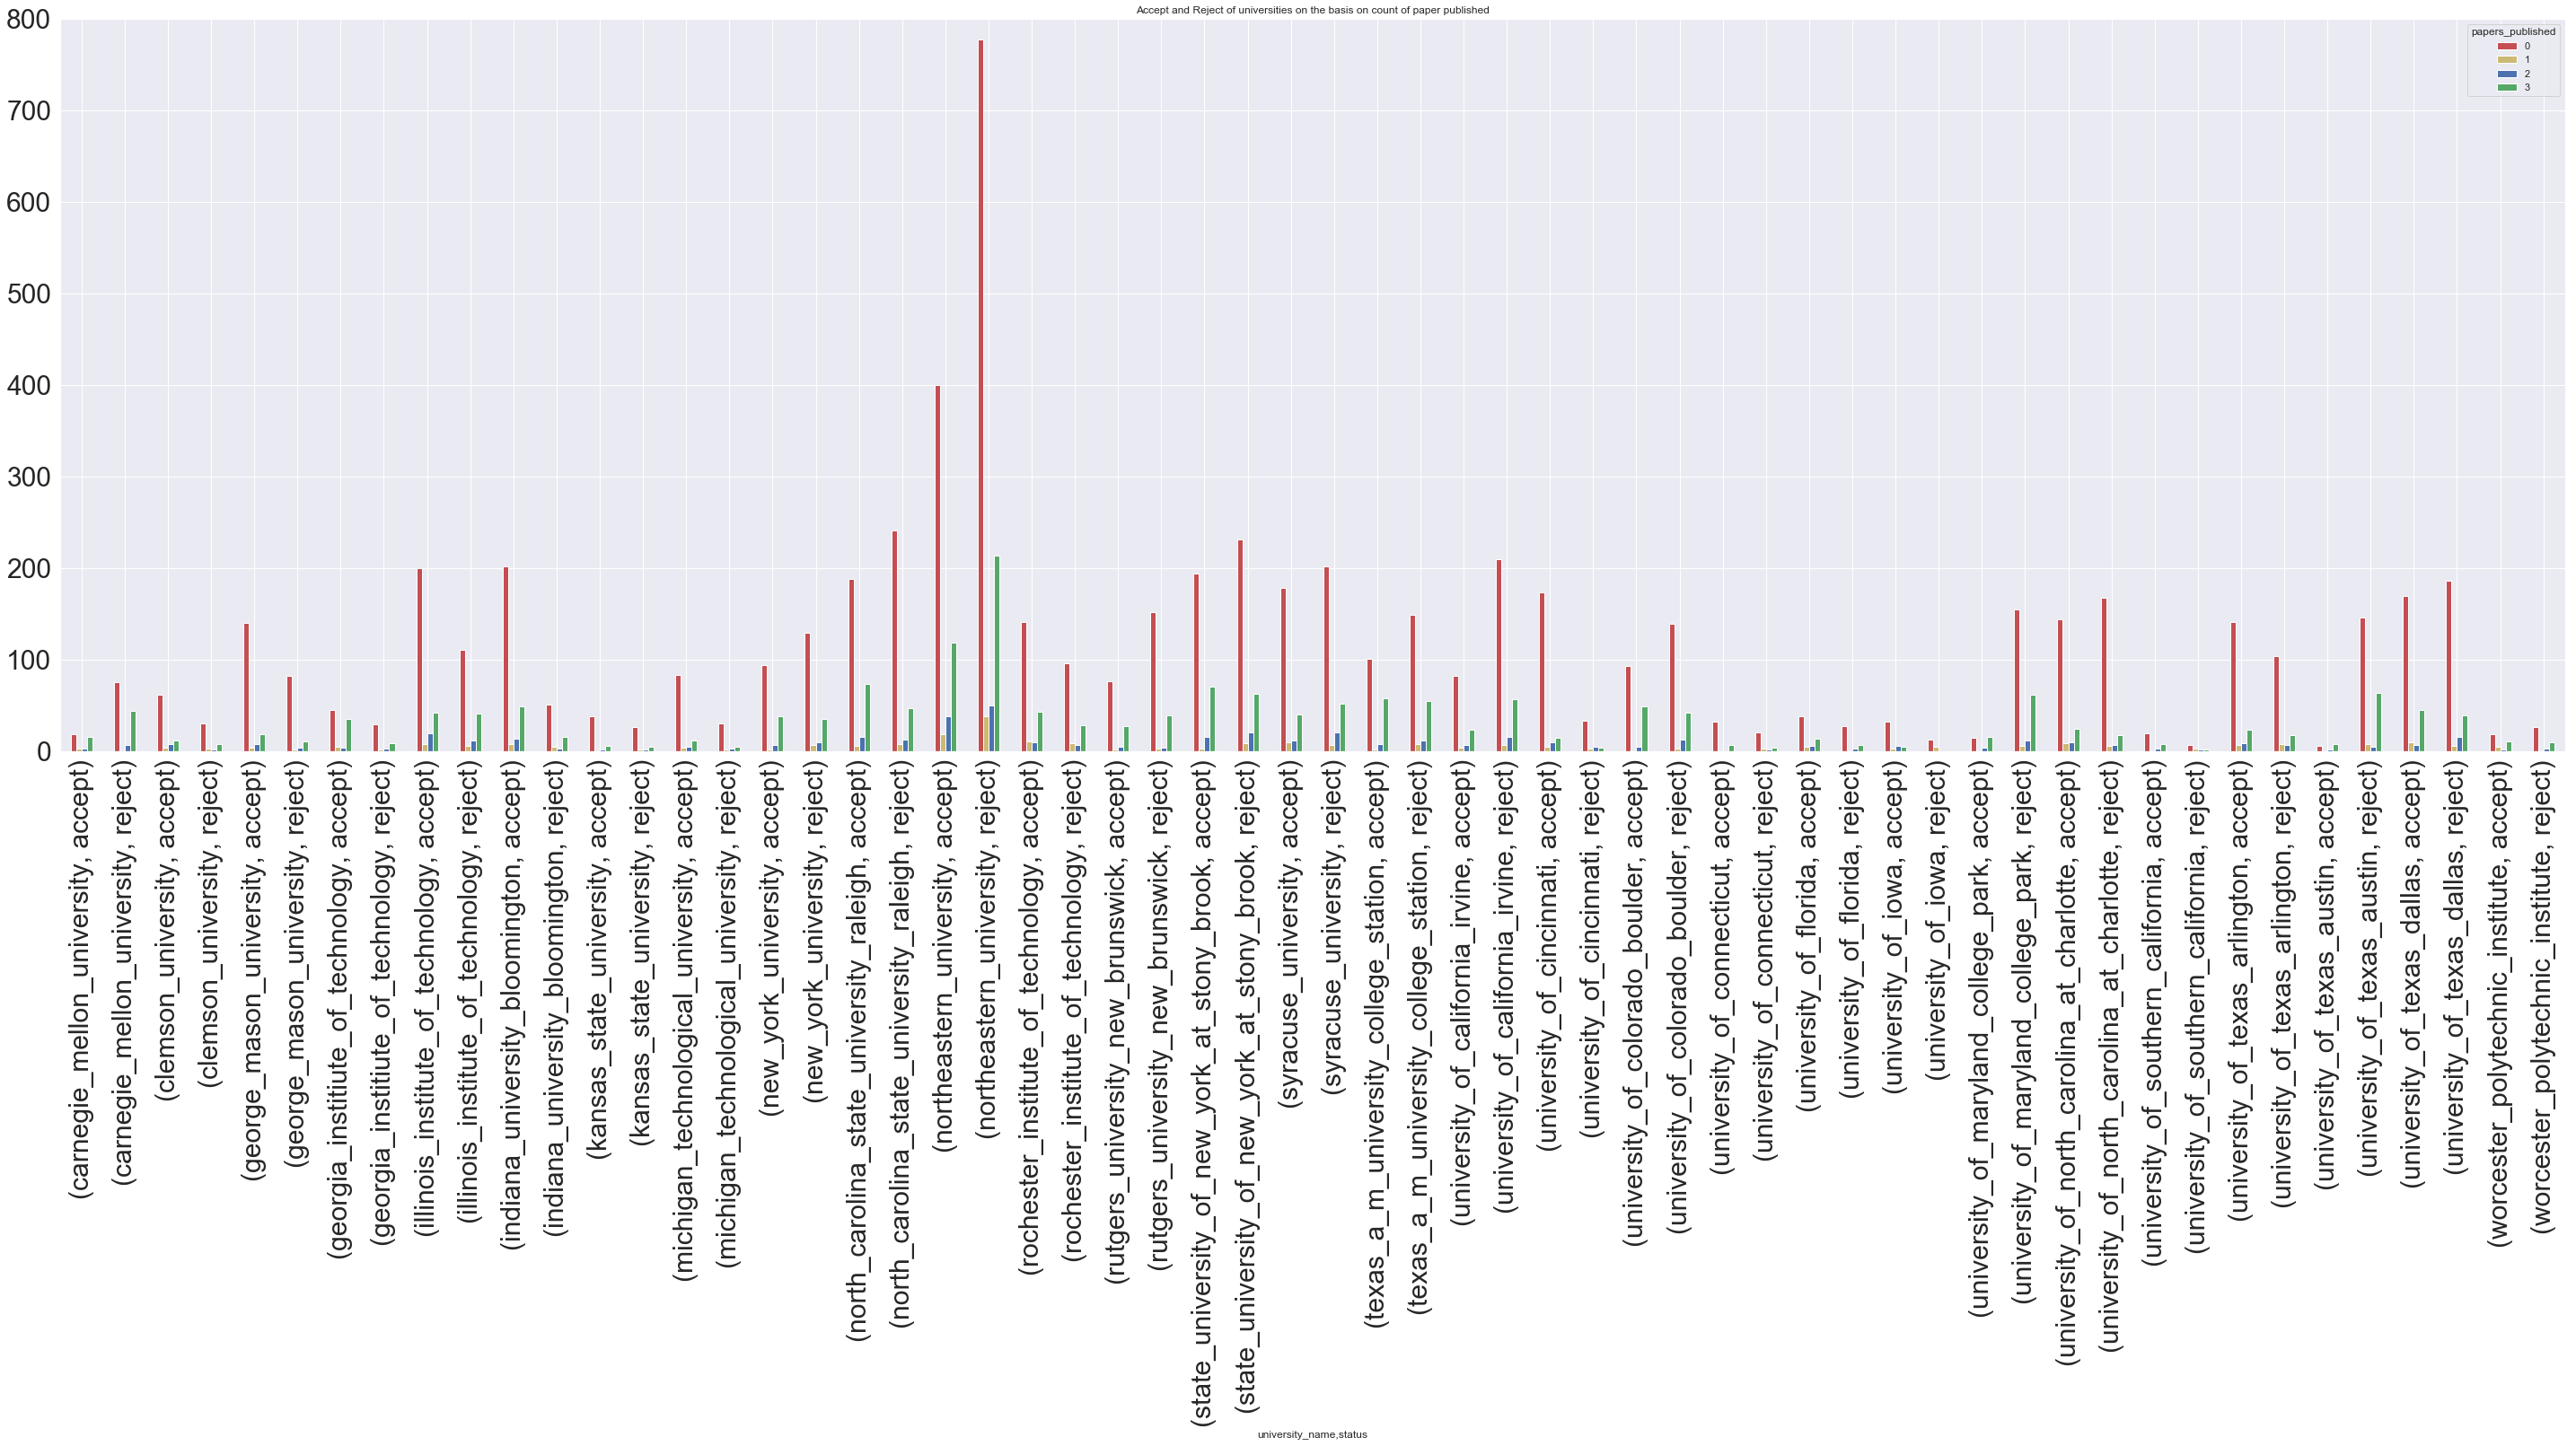

In [30]:
dataset.groupby(['university_name','status','papers_published'])['papers_published'].count().unstack().plot(legend=True,ylim = [0,800],title = 'Accept and Reject of universities on the basis on count of paper published',fontsize = 30,figsize=(50,15),kind='bar', color=['r','y','b','g'])


Here the paper published signifies:
   - 0: None
   - 1: Local paper published
   - 2: National paper published
   - 3: International paper published


<b> Toefl and IELTS Score </b>

In [31]:
dataset['test_score_toefl'].unique()

array([106., 114.,  88., 113.,  99., 107., 104., 108.,   0., 112., 102.,
        65., 100.,  95., 111., 115., 101., 110., 103.,  98., 118.,  75.,
       119., 105., 109., 117.,  93., 116., 120.,  97.,  92.,  85.,  96.,
        94.,  70.,  90.,  84.,  87.,  82.,  89.,  91.,  81.,  86.,  80.,
        78.,  74.,  83.,  77.,  45.,  79.,  44.,  31.,  69.,  58.])

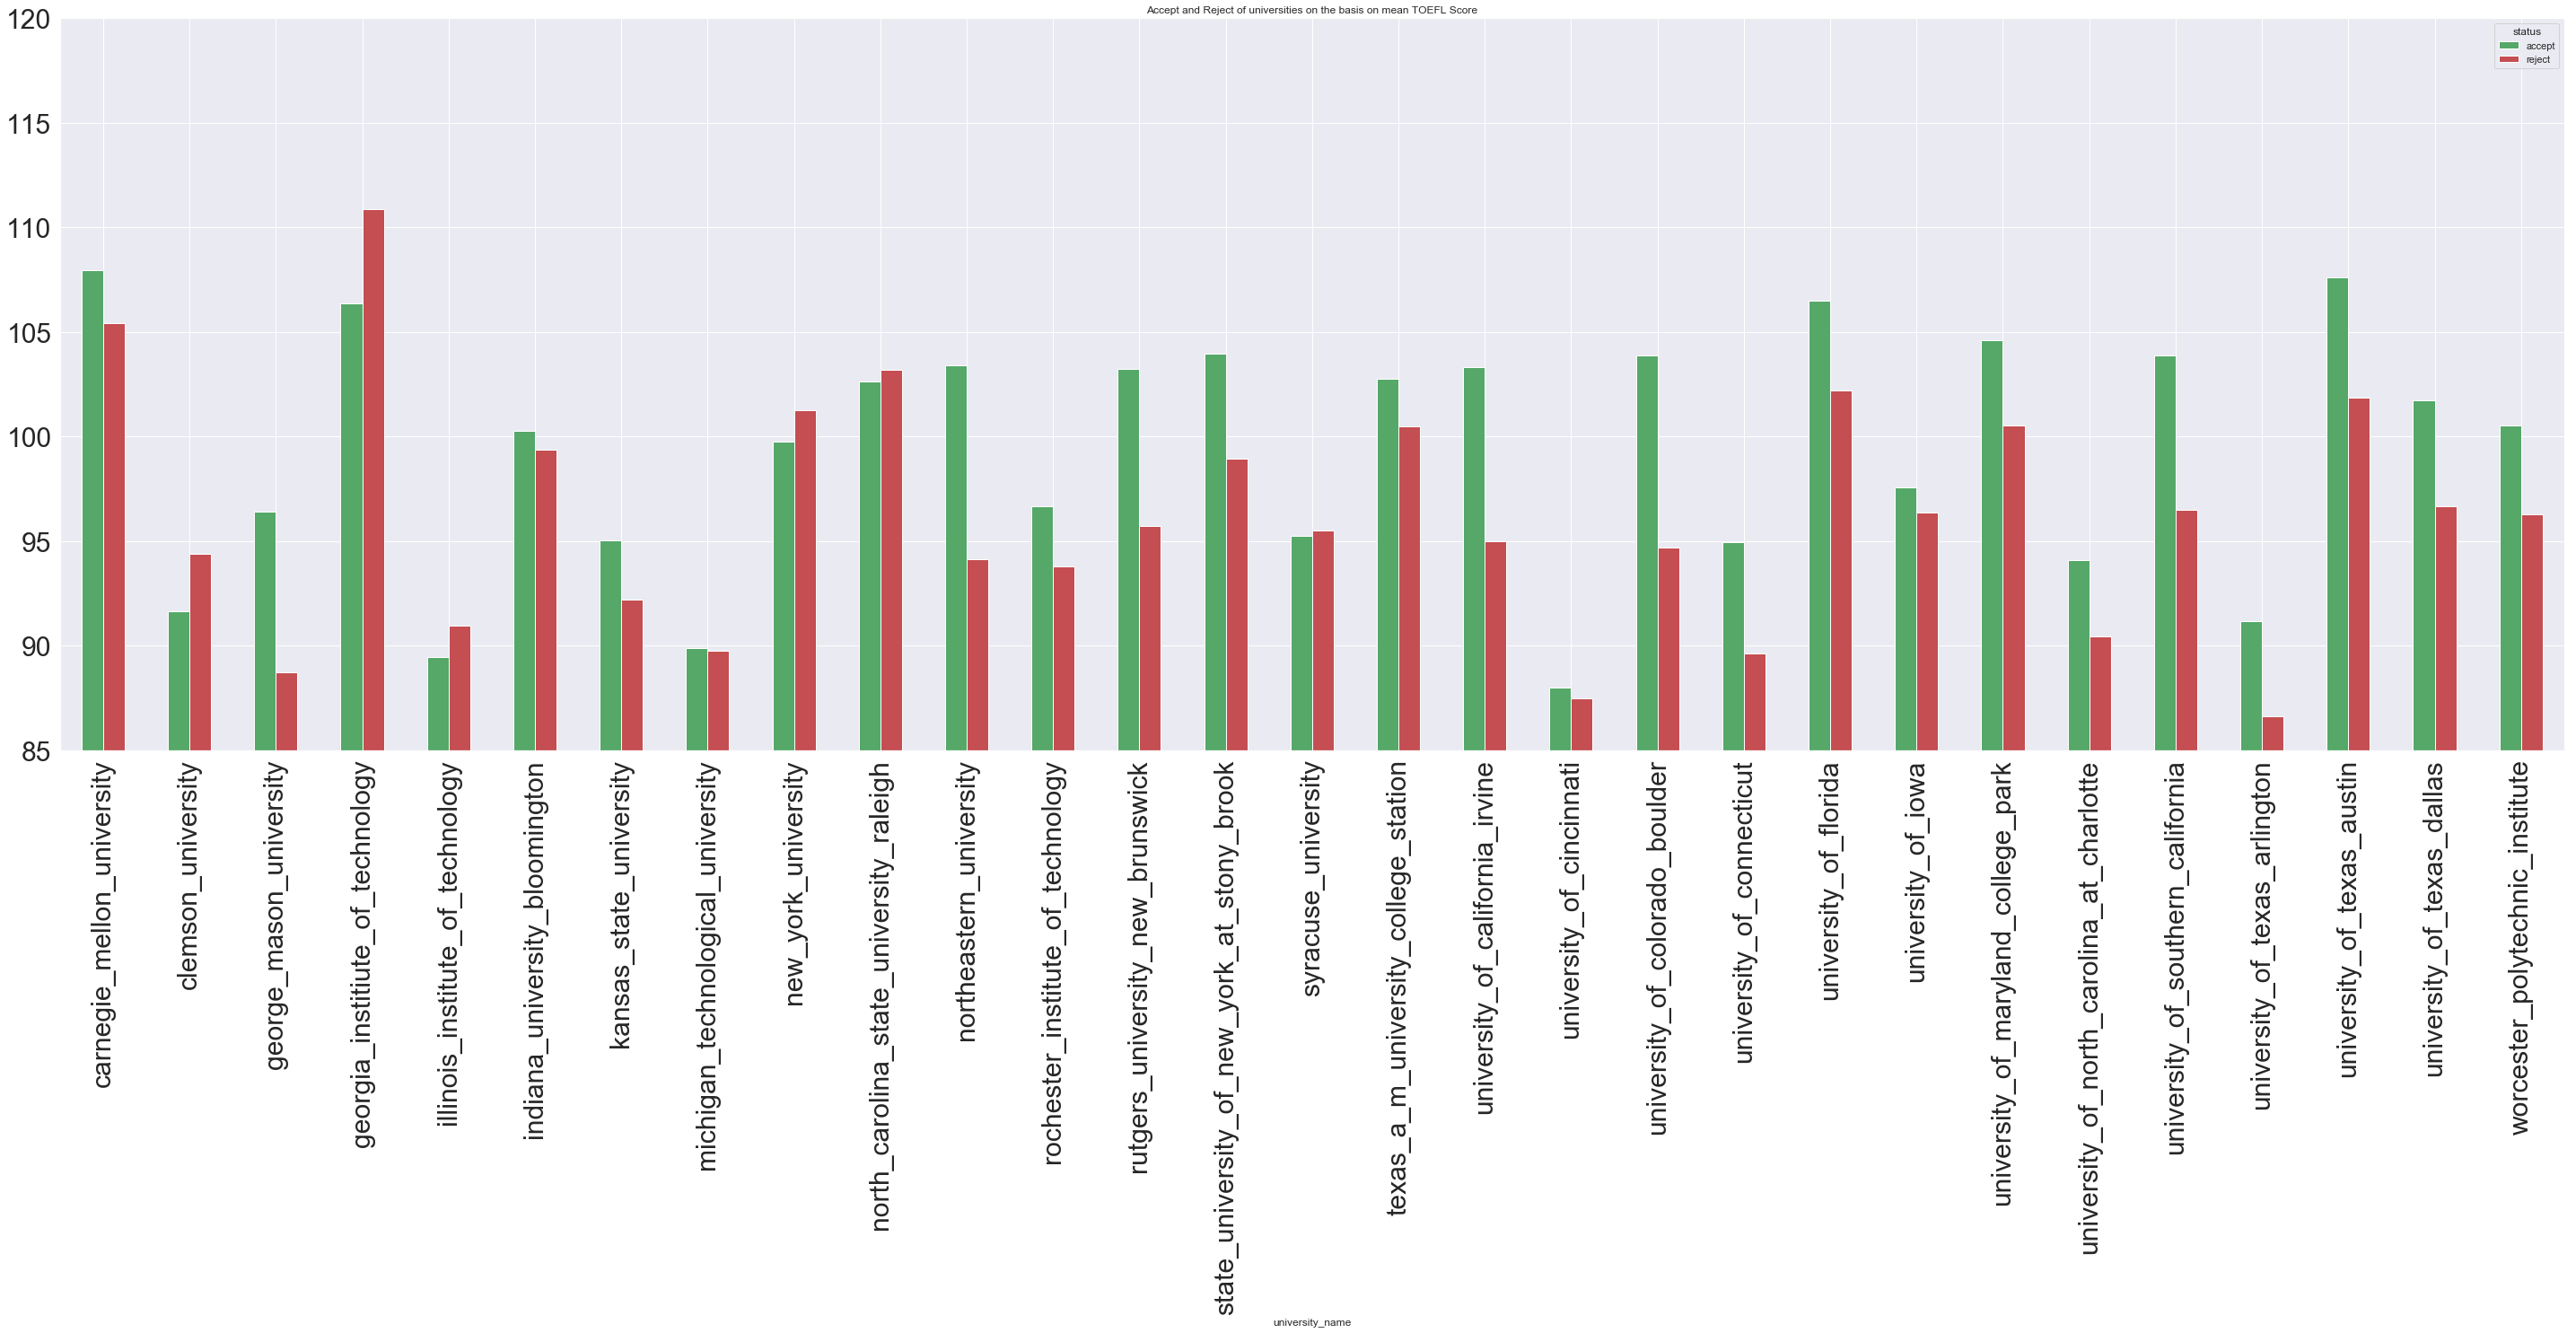

In [32]:
dataset.groupby(['university_name','status'])['test_score_toefl'].mean().unstack().plot(legend=True,ylim = [85,120],title = 'Accept and Reject of universities on the basis on mean TOEFL Score',fontsize = 30,figsize=(50,15),kind='bar', color=['g','r'])


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



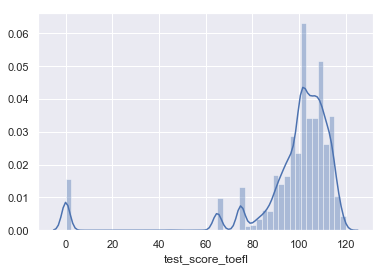

In [33]:
sns.distplot(dataset['test_score_toefl']);

This is the distribution plot of the toefl scores across multiple universities where some of the values are zero and most of the values are between 80-120

In [35]:
dataset.columns

Index(['gre_score', 'gre_score_quant', 'gre_score_verbal', 'test_score_toefl',
       'undergraduation_score', 'work_ex', 'papers_published',
       'university_name', 'status', 'ranking'],
      dtype='object')

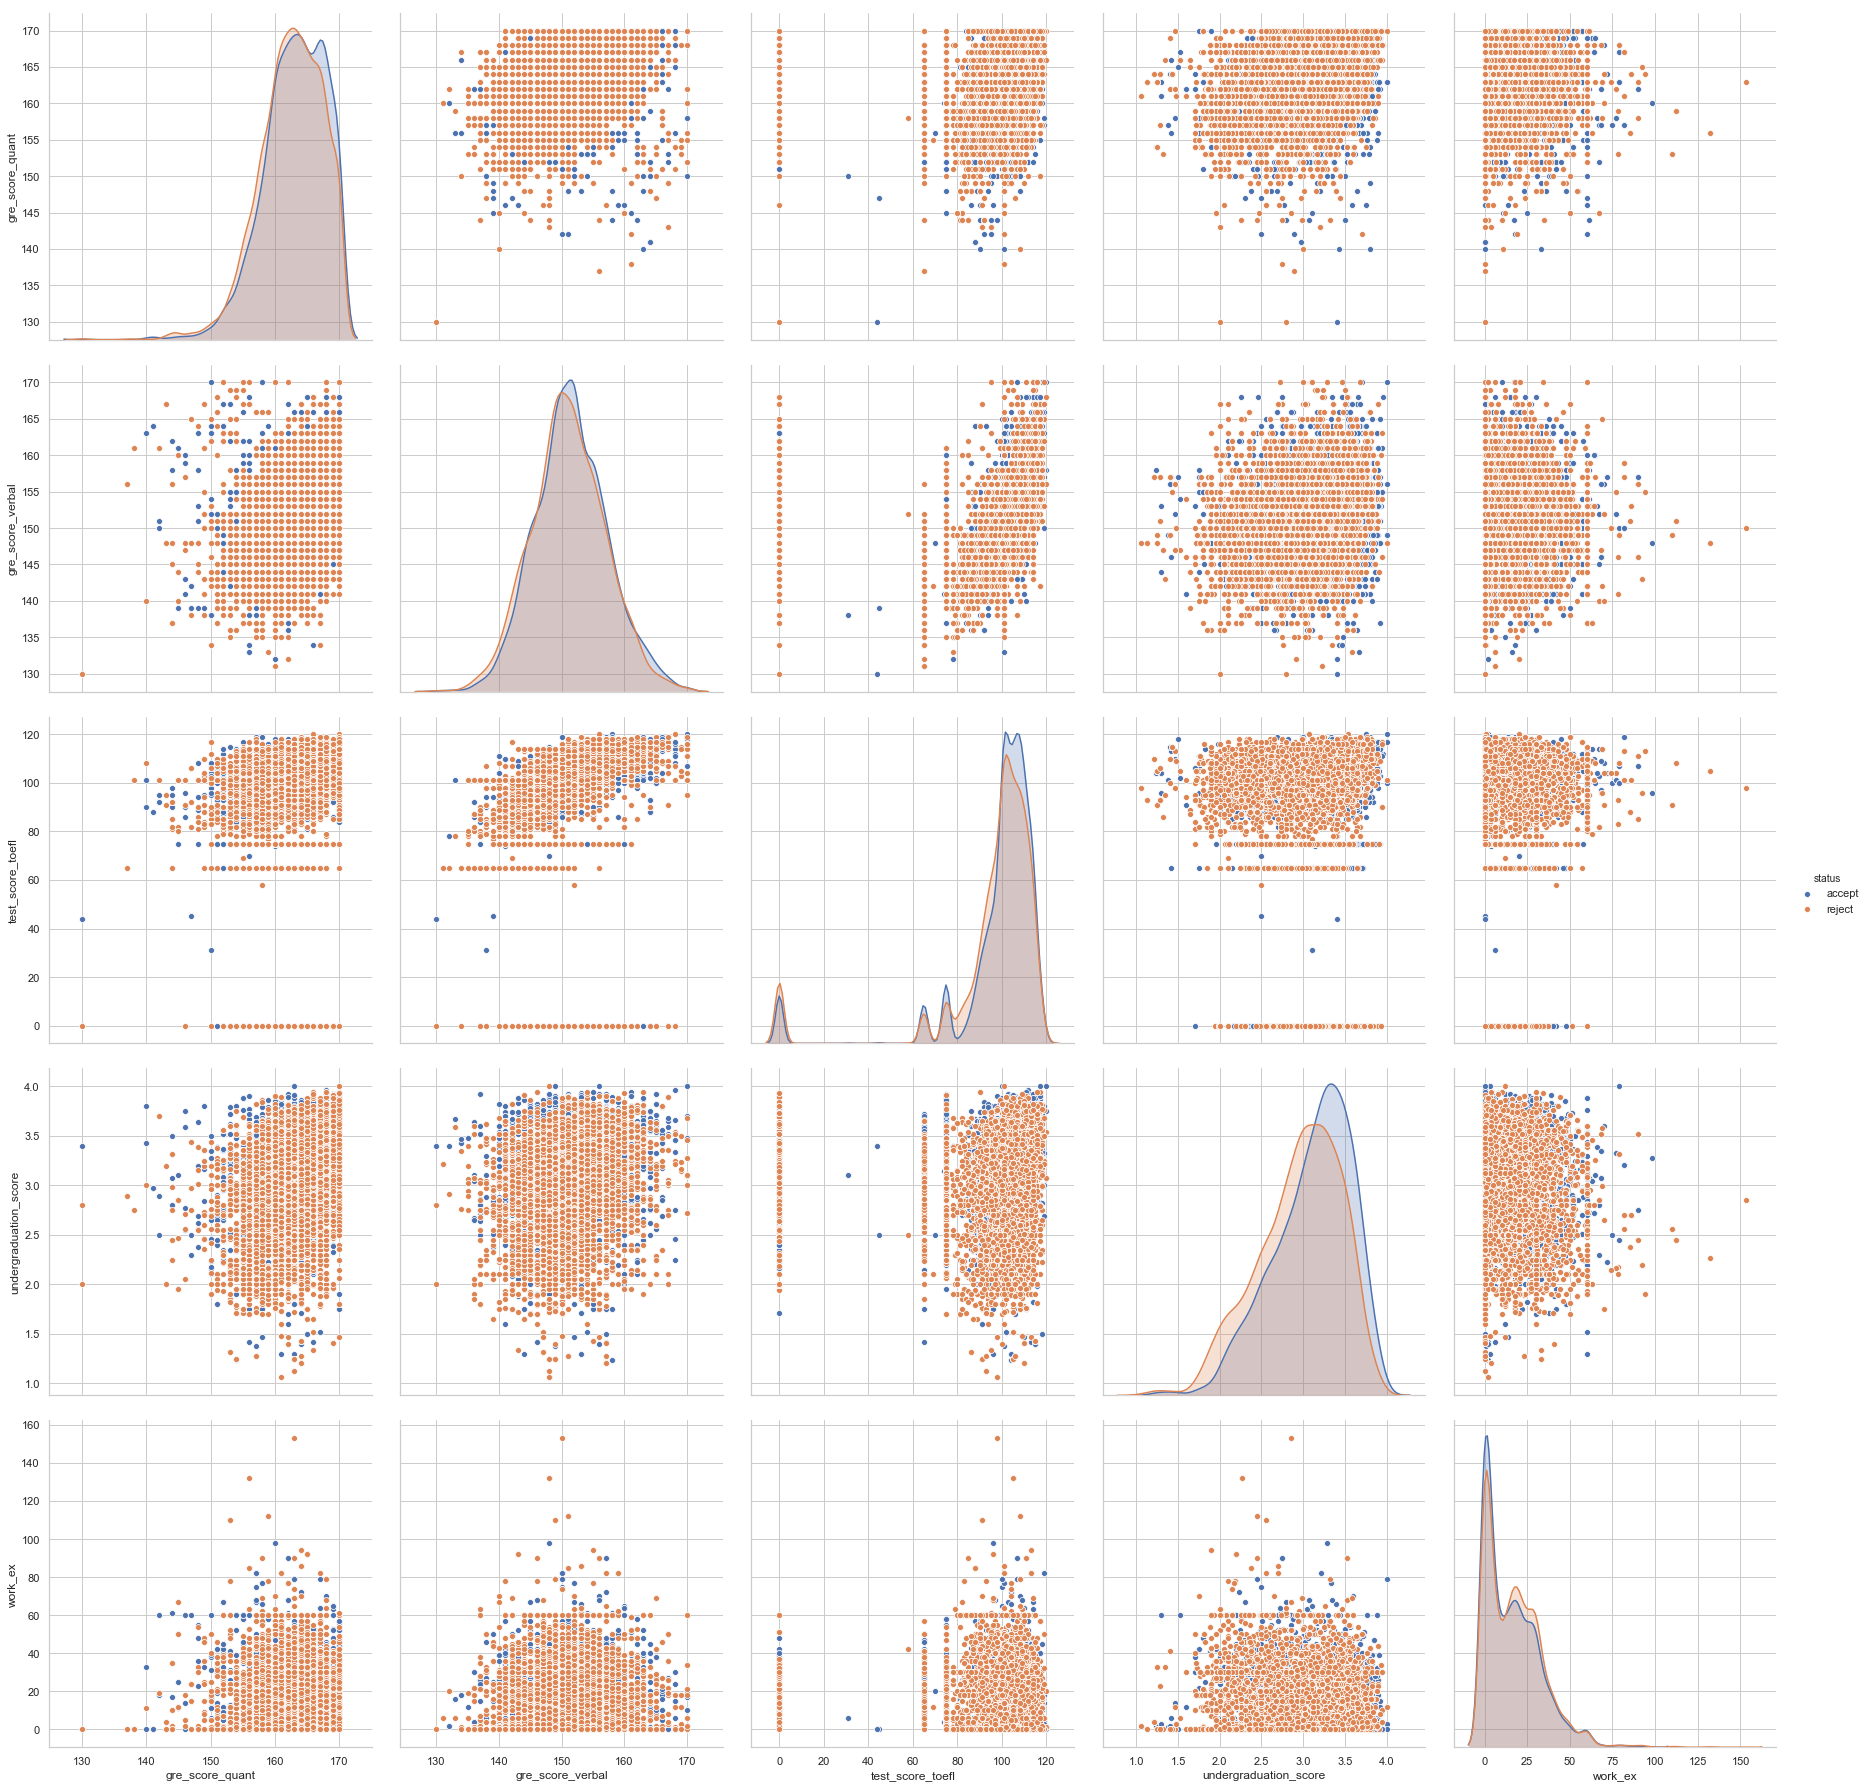

In [137]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="status",vars=['gre_score_quant', 'gre_score_verbal', 'test_score_toefl', 'undergraduation_score','work_ex'], height=5)
plt.show()

This is the pair plot where blue color shows 'Accept' and orange color shows 'reject' for multiple universites for different pairs of x and y axis.
<b>
Columns consider for the pair plot:
    - gre_score_quant
    - gre_score_verbal
    - test_score_toefl
    - undergraduation_score
    - work_ex

<b> Heat Map </b>

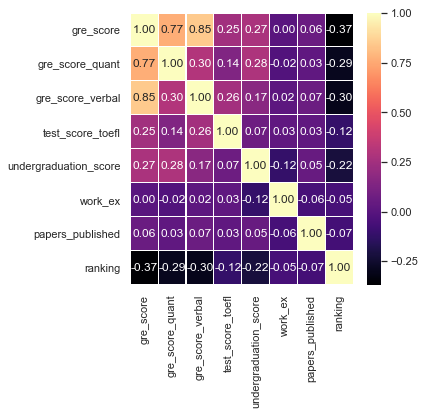

In [58]:
#getting the correlation of data
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dataset.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

- As depicted in the heat map, the values 'gre_score_verbal' and 'gre_score' are correlated as their absolute value is greater than 0.80 (We can drop one column while making the model so that model doesnot overfit)
- All the other columns are less correlated